In [4]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

## Importing the dataset - Housing Data

In [6]:
# Read the csv file.
dfHouse =pd.read_csv('train.csv')

In [7]:
dfHouse.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

### Performing the Routine checks

##### Shape, info, Describe

In [10]:
## Check the number of rows and columns in the dataframe
dfHouse.shape

(1460, 81)

In [11]:
# Check the column-wise info of the dataframe
dfHouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [12]:
# Check the summary for the numeric columns 
dfHouse.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

#### Data quality Check And Missing Values

2. Remove columns with high missing percentage
3. Impute missing values for the columns with less percentage < 13% Categorical column - which catagory column can be imputed Numerical column and others - Either impute with mean, median or 0
3. Find the percentage of missing values for all columns


In [13]:
#Listing percentage of missing values in each columns 
pd.set_option('display.max_columns', 150)
col_missing = (dfHouse.isnull().sum() * 100 )/len(dfHouse)
col_missing

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
                   ...    
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        0.000000
F

Remove columns with high percentage of missing value - Consideting high percentage as > 30%
So, dropping all the columns from the dataframe with missing value > 30%

In [14]:
#Removing the columns with high missing percentage - The high missing percentage is considered to be > 30%
col_missing = list(col_missing[col_missing.values>=0.3].index)
dfHouse.drop(labels=col_missing,axis=1,inplace=True)

In [15]:
# List of the Remaiing columns
list(dfHouse.columns)

# After dropping the columns with missing values > 30% here is the count of remaing columns
print(len(list(dfHouse.columns)))

63


Percentage of the missing values in the Remaining columns

In [16]:
#Percentage of missing values in all the other remaning column

col_missing = (dfHouse.isnull().sum() * 100 )/len(dfHouse)
col_missing

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
                   ...   
Electrical       0.068493
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath    

In [17]:
dfHouse.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
                ..
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

Missing values in the Rows > 30% (Dropping all the Rows with the missing value > 30%)
Let's check & drop the number of rows that have missing values that are > 30%

In [18]:
# Dropping all the rows with missing value that are > 30%

rows_missing = dfHouse.isnull().sum(axis = 1)
rows_missing=list(rows_missing[rows_missing.values>=0.3*len(dfHouse)].index)
dfHouse.drop(labels=rows_missing,axis=0,inplace=True)
print(len(rows_missing))

0


In [19]:
dfHouse.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
                ..
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

In [24]:
dfHouse.shape

(1460, 63)

In [28]:
dfHouse.dropna(inplace=True)

In [30]:
dfHouse.shape

(1459, 63)

In [33]:
##Derived variables from the dataset
#New variable creation TotalSF i.e combination of TotalBsmtSF, 1stFlrSF, 2ndFlrSF
dfHouse['TotalSF'] = dfHouse['TotalBsmtSF'] + dfHouse['1stFlrSF'] + dfHouse['2ndFlrSF']
#house["house_age_when_sold_in_month"] = (((house["YrSold"]-1) - house["YearBuilt"])*12) + house["MoSold"]
# derive house age = 2019 - year build
dfHouse["house_age"] = 2019 - dfHouse["YearBuilt"]
# derive garage age = 2019 - year build

# derive gap b/w house build and remodel = YearRemodAdd - year build
dfHouse["gap_between_build_remodel"] = dfHouse["YearRemodAdd"] - dfHouse["YearBuilt"]

In [35]:
#converting to correct datatype for some variables
dfHouse['MSSubClass'] = dfHouse['MSSubClass'].astype('object')
dfHouse['OverallCond'] = dfHouse['OverallCond'].astype('object')
dfHouse['YrSold'] = dfHouse['YrSold'].astype('object')
dfHouse['MoSold'] = dfHouse['MoSold'].astype('object')

In [36]:
#dividing the variables to numeric and categorical
house_numeric=dfHouse.select_dtypes(include=['float64','int64'])
house_numeric.head()

Id  LotArea  OverallQual  YearBuilt  YearRemodAdd  BsmtFinSF1  BsmtFinSF2  \
0   1     8450            7       2003          2003         706           0   
1   2     9600            6       1976          1976         978           0   
2   3    11250            7       2001          2002         486           0   
3   4     9550            7       1915          1970         216           0   
4   5    14260            8       2000          2000         655           0   

   BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0        150          856       856       854             0       1710   
1        284         1262      1262         0             0       1262   
2        434          920       920       866             0       1786   
3        540          756       961       756             0       1717   
4        490         1145      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0             8           0           2         548           0           61   
1             6           1           2         460         298            0   
2             6           1           2         608           0           42   
3             7           1           3         642           0           35   
4             9           1           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice  \
0              0          0            0         0        0     208500   
1              0          0            0         0        0     181500   
2              0          0            0         0        0     223500   
3            272          0            0         0        0     140000   
4              0          0            0         0        0     250000   

   TotalSF  house_age  gap_between_build_remodel  
0     2566         16                          0  
1     2524         43                          0  
2     2706         18                          1  
3     2473        104                         55  
4     3343         19                          0

In [37]:
house_numeric.columns

Index(['Id', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'TotalSF', 'house_age', 'gap_between_build_remodel'],
      dtype='object')

In [38]:
house_categorical=dfHouse.select_dtypes(include=['object'])
house_categorical.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'PavedDrive', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [39]:
print(len(house_categorical.columns))
print(len(house_numeric.columns))

32
34


In [40]:
# correlation matrix
corr = house_numeric.corr()
corr

Id   LotArea  OverallQual  YearBuilt  \
Id                         1.000000 -0.033170    -0.027553  -0.013945   
LotArea                   -0.033170  1.000000     0.105786   0.014296   
OverallQual               -0.027553  0.105786     1.000000   0.573334   
YearBuilt                 -0.013945  0.014296     0.573334   1.000000   
YearRemodAdd              -0.023158  0.013852     0.551605   0.592512   
BsmtFinSF1                -0.004001  0.214121     0.239265   0.250465   
BsmtFinSF2                -0.005668  0.111158    -0.059291  -0.048903   
BsmtUnfSF                 -0.007508 -0.002641     0.308018   0.149444   
TotalBsmtSF               -0.013815  0.260962     0.537523   0.393159   
1stFlrSF                   0.011627  0.299533     0.475933   0.283056   
2ndFlrSF                   0.004885  0.051030     0.295969   0.009784   
LowQualFinSF              -0.044139  0.004773    -0.030502  -0.183774   
GrLivArea                  0.008524  0.263109     0.593021   0.199286   
BsmtFullBath               0.003158  0.158147     0.110700   0.188374   
BsmtHalfBath              -0.019917  0.048034    -0.040291  -0.037990   
FullBath                   0.004758  0.126100     0.551267   0.467960   
HalfBath                   0.005494  0.014333     0.274328   0.241923   
BedroomAbvGr               0.037577  0.119700     0.101789  -0.070813   
KitchenAbvGr               0.003177 -0.017796    -0.184040  -0.174715   
TotRmsAbvGrd               0.026948  0.190037     0.427720   0.095401   
Fireplaces                -0.018788  0.271398     0.396455   0.148580   
GarageCars                 0.016254  0.154893     0.600991   0.537866   
GarageArea                 0.018010  0.180392     0.561980   0.479460   
WoodDeckSF                -0.029716  0.171701     0.239000   0.224946   
OpenPorchSF                0.000267  0.084751     0.308554   0.189359   
EnclosedPorch              0.003272 -0.018360    -0.114162  -0.387177   
3SsnPorch                 -0.046550  0.020417     0.030314   0.031461   
ScreenPorch                0.001617  0.043147     0.064755  -0.050175   
PoolArea                   0.057163  0.077669     0.065143   0.005006   
MiscVal                   -0.006155  0.038063    -0.031461  -0.034330   
SalePrice                 -0.021756  0.263837     0.791069   0.523273   
TotalSF                    0.000693  0.307281     0.667988   0.348158   
house_age                  0.013945 -0.014296    -0.573334  -1.000000   
gap_between_build_remodel -0.002326 -0.005954    -0.242086  -0.733889   

                           YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
Id                            -0.023158   -0.004001   -0.005668  -0.007508   
LotArea                        0.013852    0.214121    0.111158  -0.002641   
OverallQual                    0.551605    0.239265   -0.059291   0.308018   
YearBuilt                      0.592512    0.250465   -0.048903   0.149444   
YearRemodAdd                   1.000000    0.129259   -0.067575   0.181520   
BsmtFinSF1                     0.129259    1.000000   -0.050328  -0.495718   
BsmtFinSF2                    -0.067575   -0.050328    1.000000  -0.209395   
BsmtUnfSF                      0.181520   -0.495718   -0.209395   1.000000   
TotalBsmtSF                    0.292546    0.521963    0.104593   0.415283   
1stFlrSF                       0.241344    0.445473    0.096948   0.317827   
2ndFlrSF                       0.139607   -0.136697   -0.099146   0.004661   
LowQualFinSF                  -0.062356   -0.064604    0.014784   0.028134   
GrLivArea                      0.287677    0.208088   -0.009686   0.240210   
BsmtFullBath                   0.120148    0.649025    0.158557  -0.423256   
BsmtHalfBath                  -0.012165    0.067281    0.070904  -0.095880   
FullBath                       0.438733    0.059102   -0.076306   0.289189   
HalfBath                       0.182595    0.005085   -0.031922  -0.040792   
BedroomAbvGr                  -0.040718   -0.107281   -0.015696   0.16670

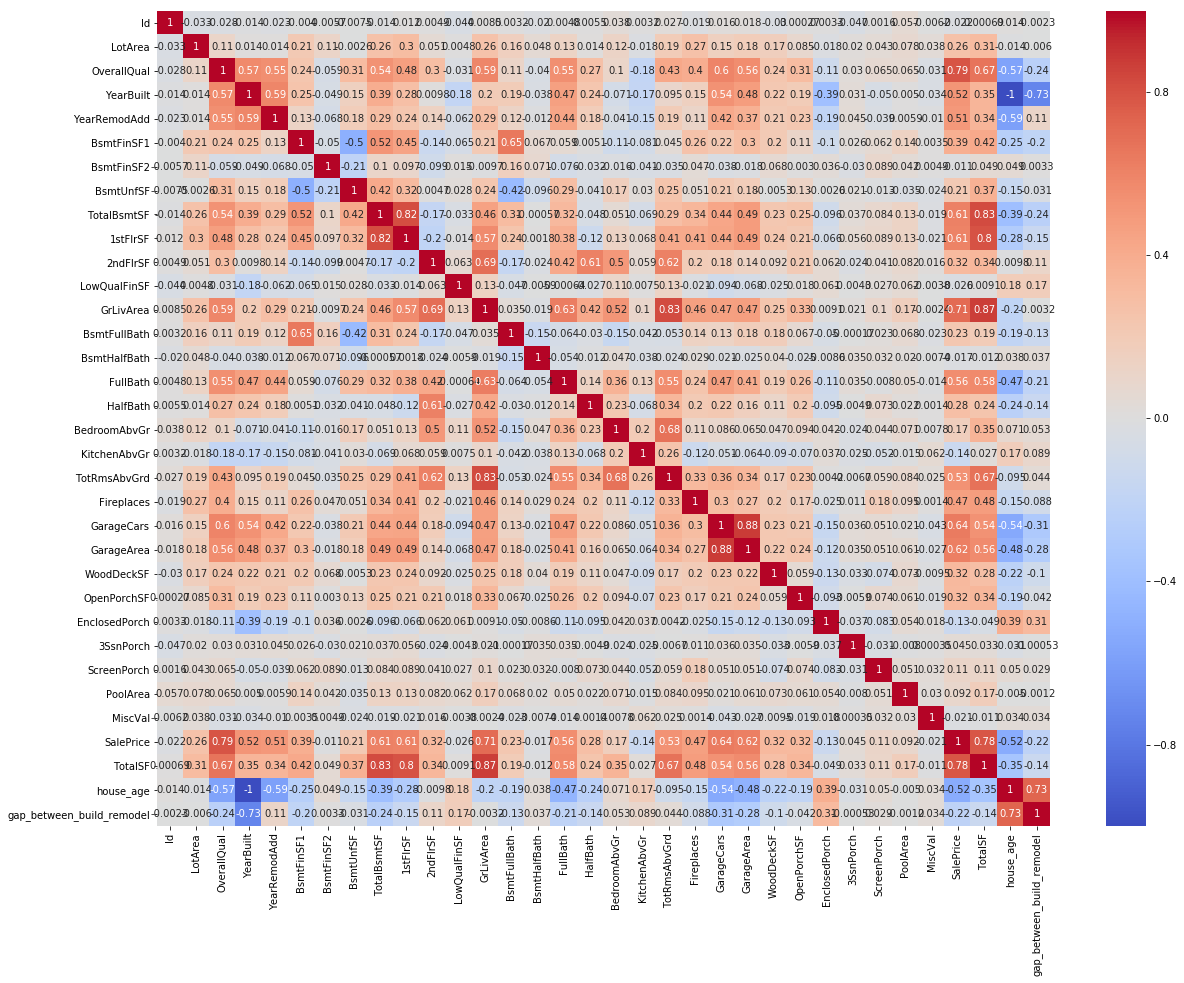

In [41]:
# plotting a heatmap
plt.figure(figsize = (20, 15))
# heatmap
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

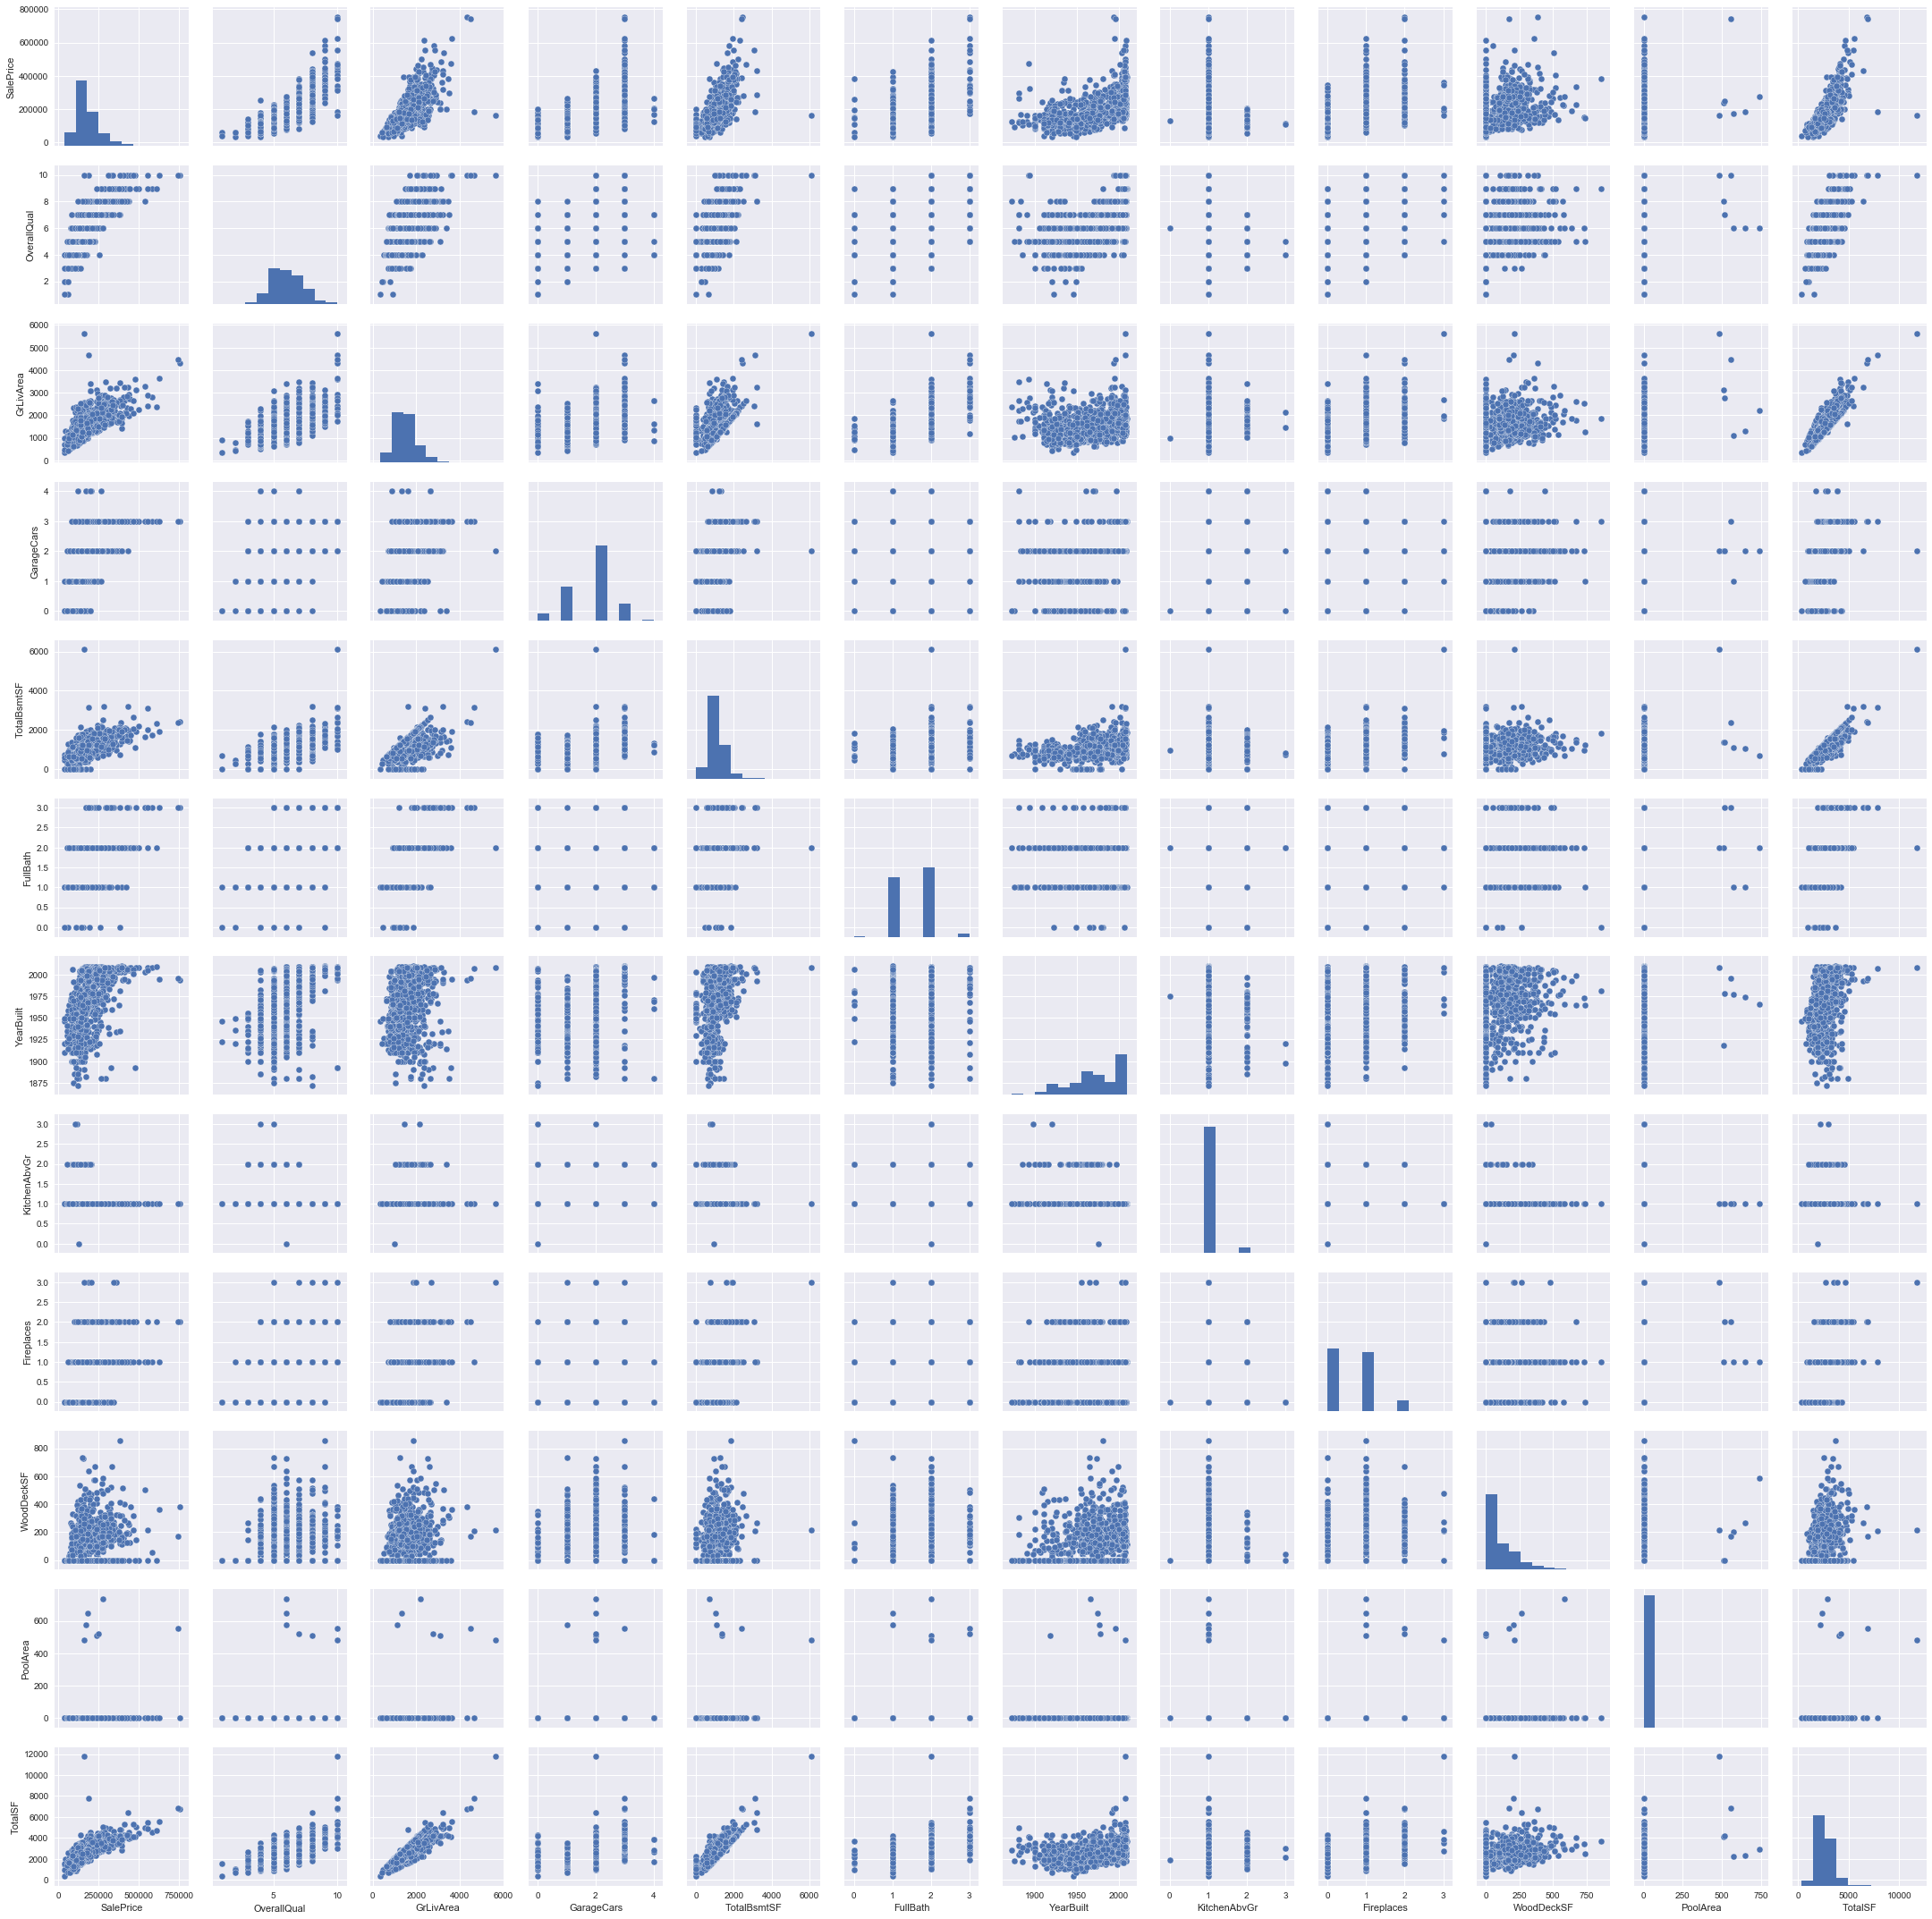

In [43]:
#plotting scatter plot for some of the numeric variables
sns.set()
plt.figure(figsize=(40, 30))
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt',
        'KitchenAbvGr','Fireplaces','WoodDeckSF','PoolArea','TotalSF']
sns.pairplot(dfHouse[cols], size = 2.5)
plt.show();

#### Univariate Analysis

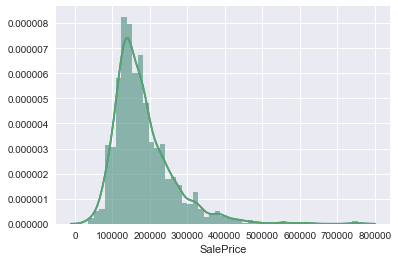

In [45]:
#distplot of the target variables
sns.distplot(dfHouse['SalePrice'])
plt.show()

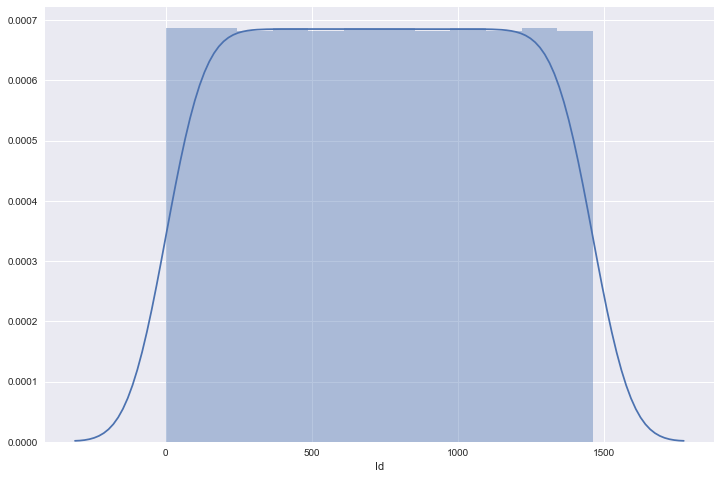

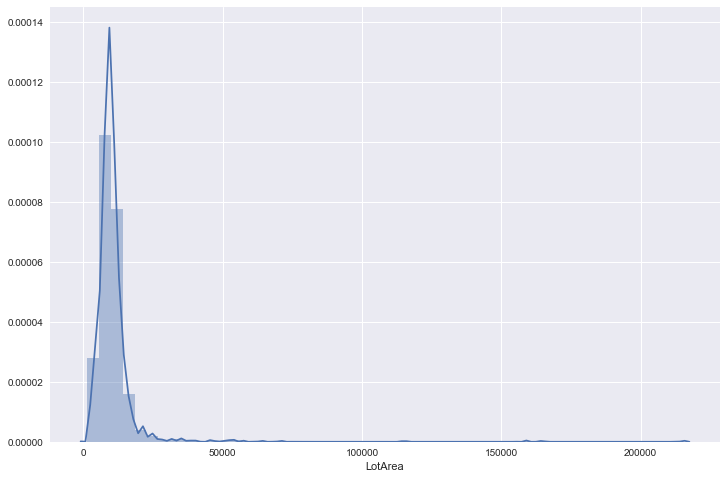

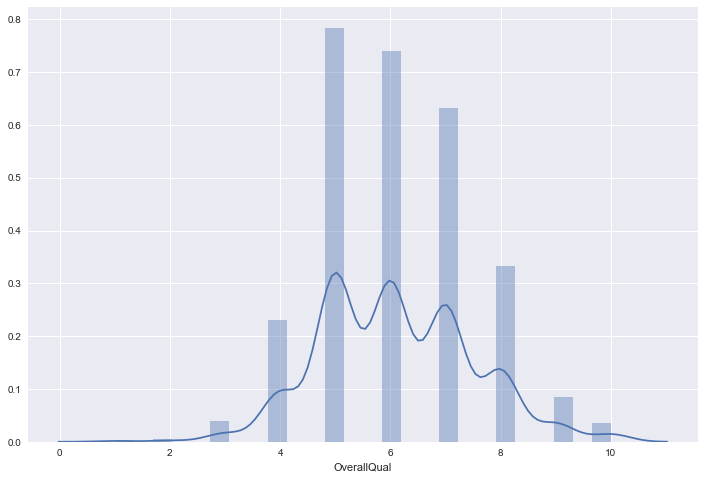

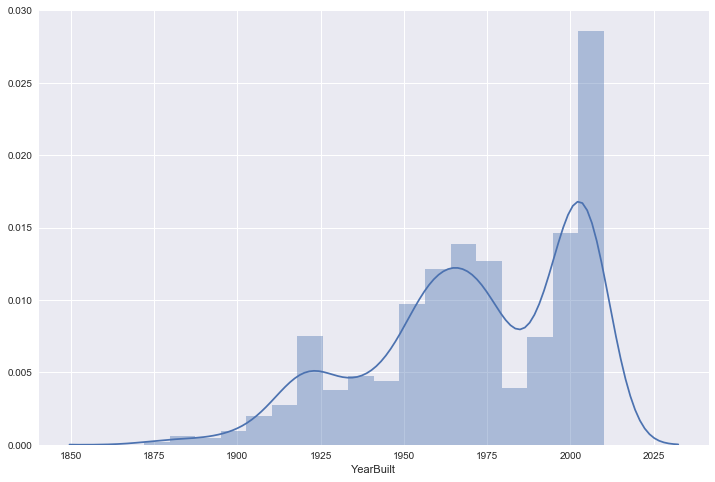

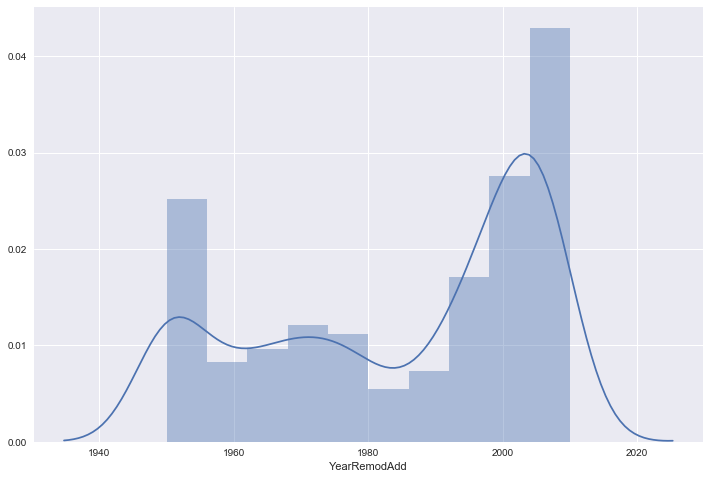

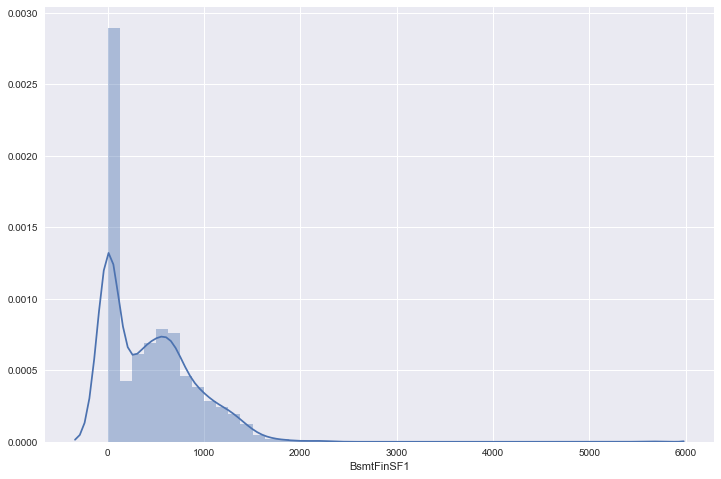

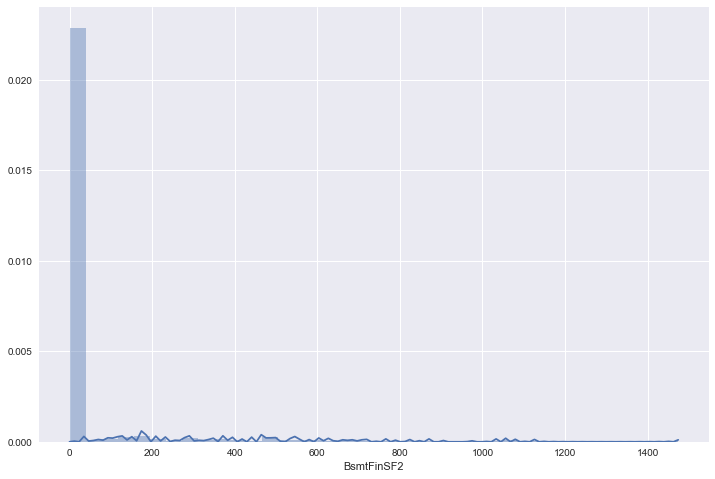

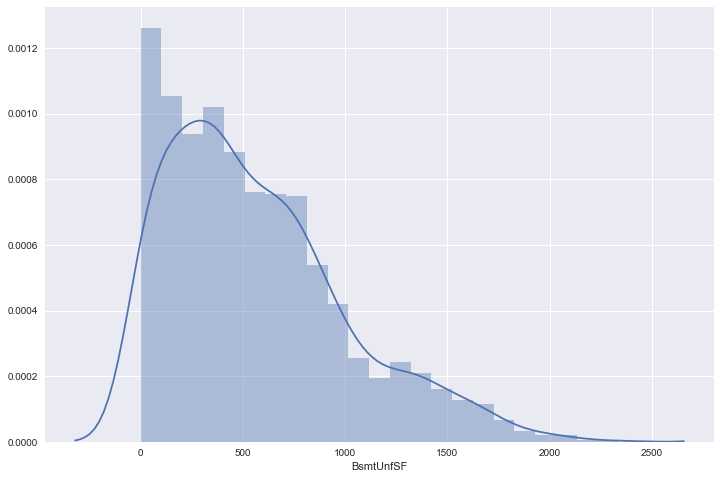

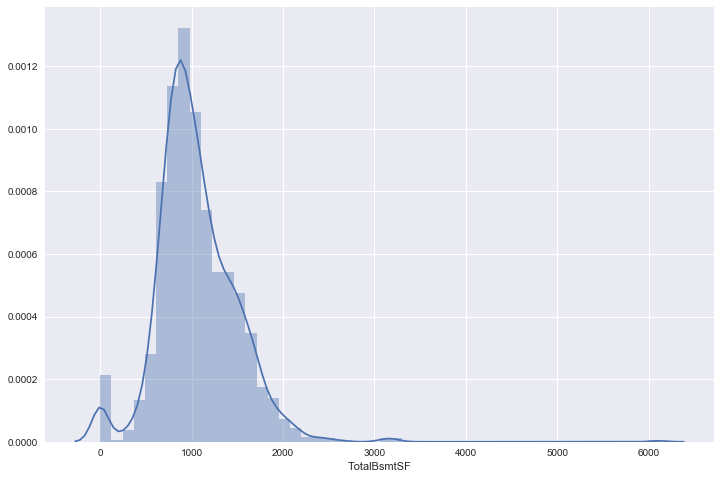

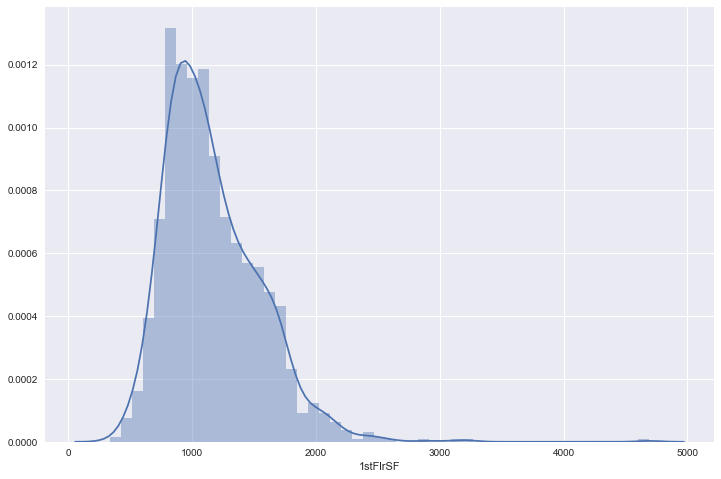

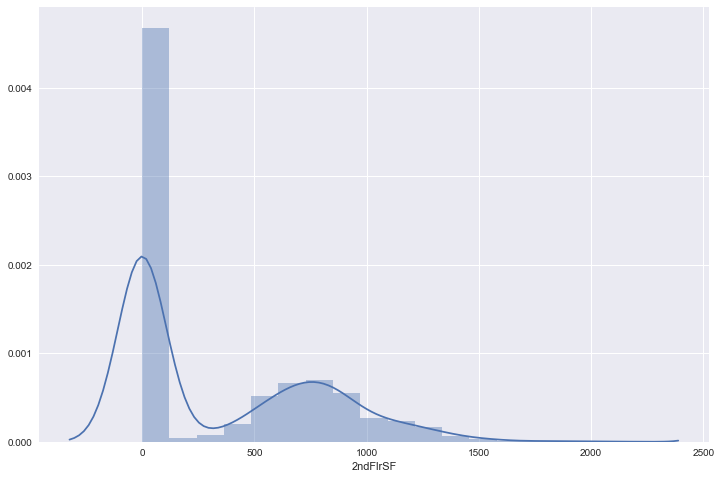

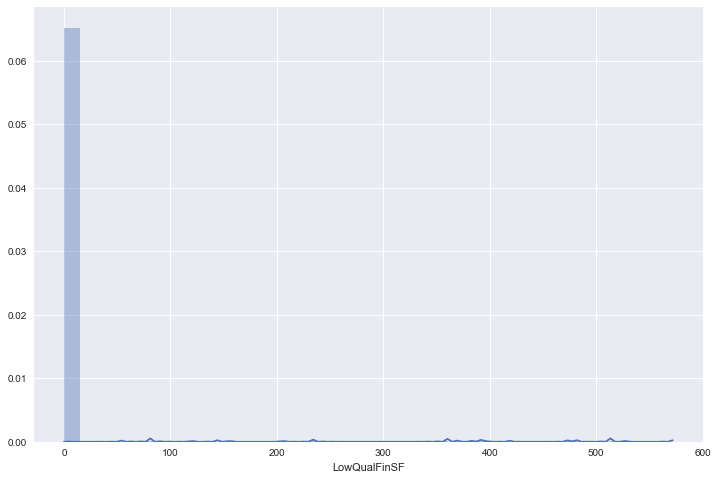

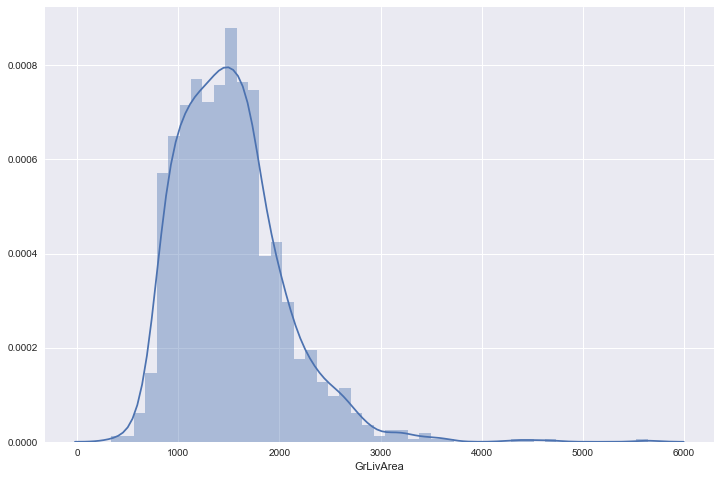

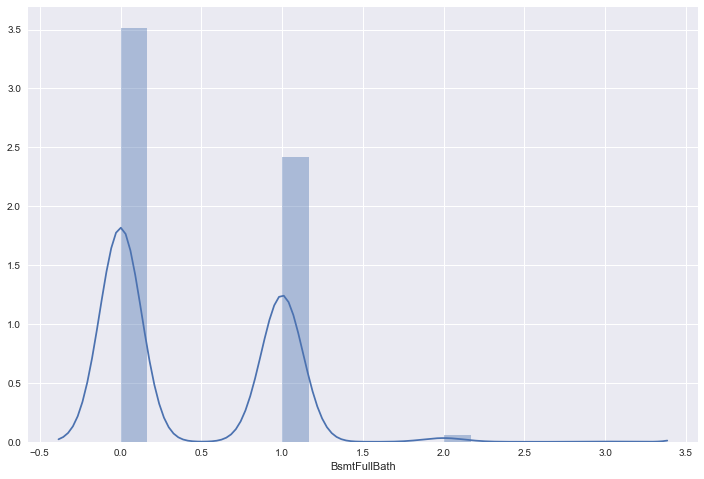

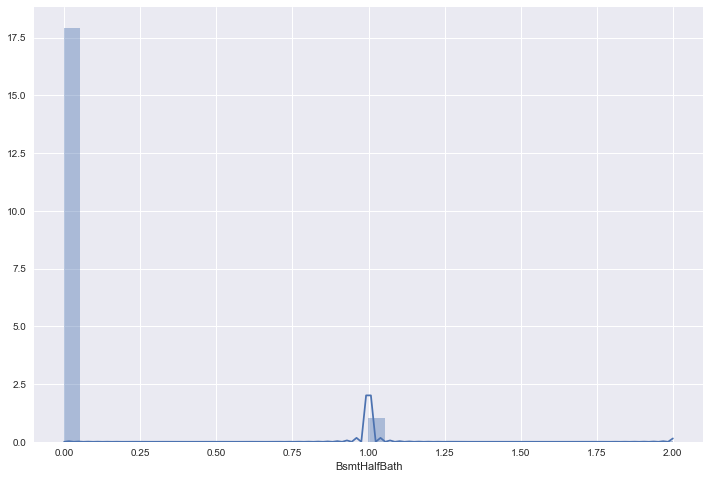

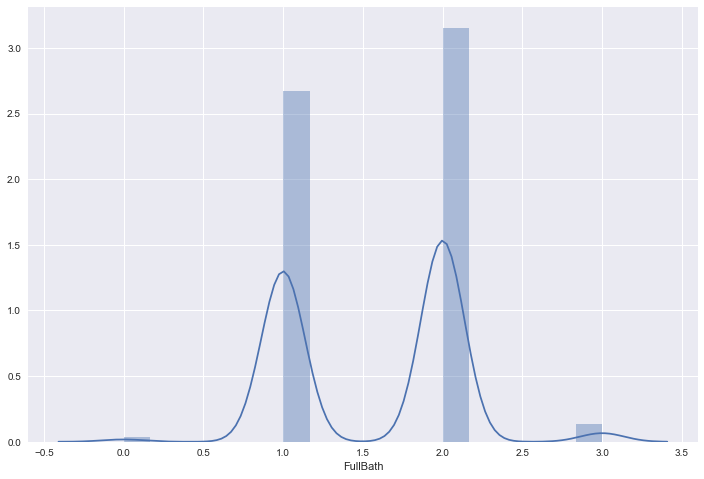

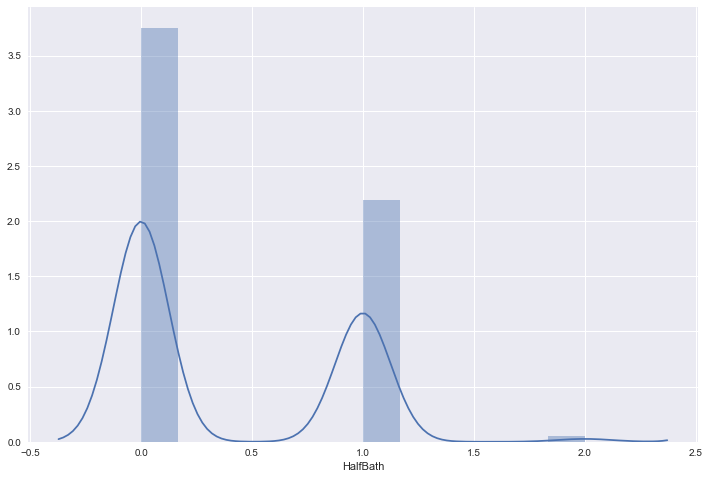

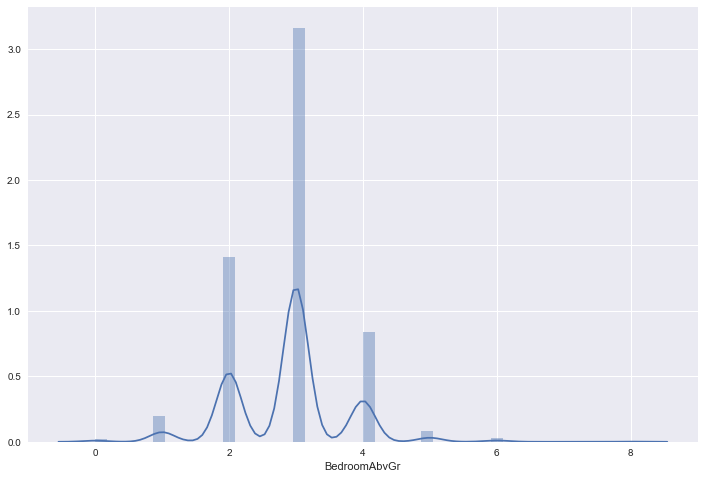

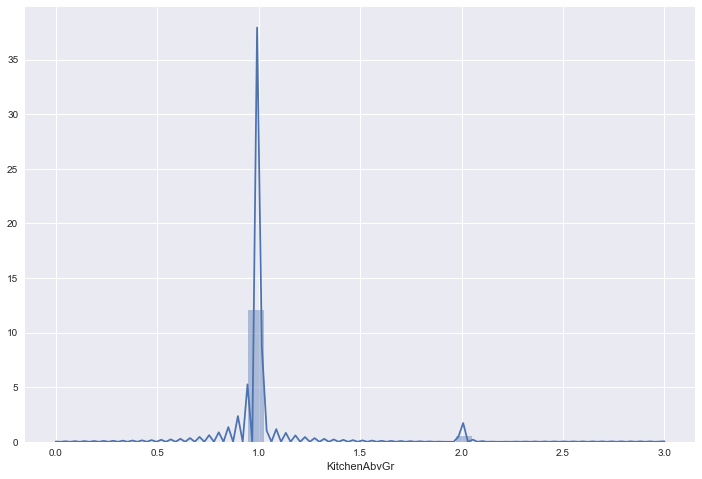

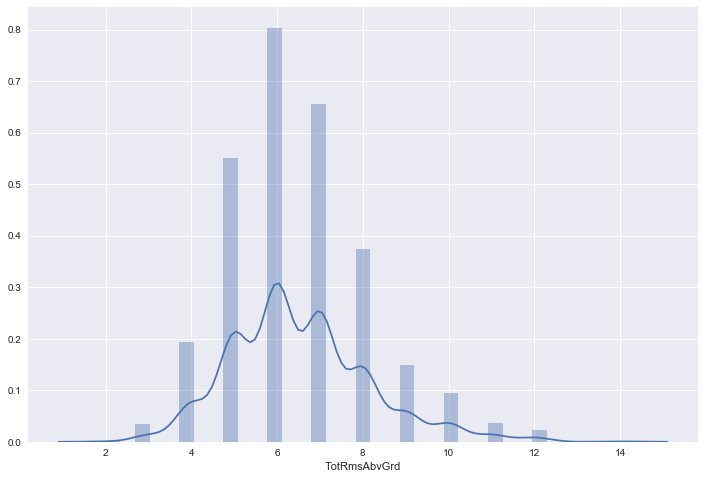

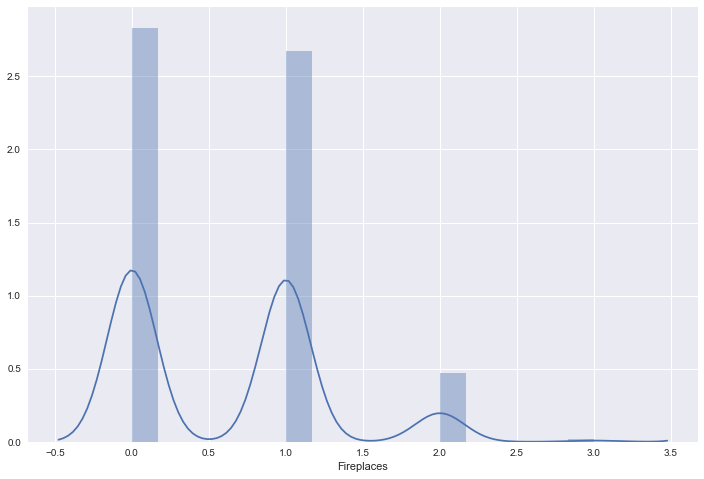

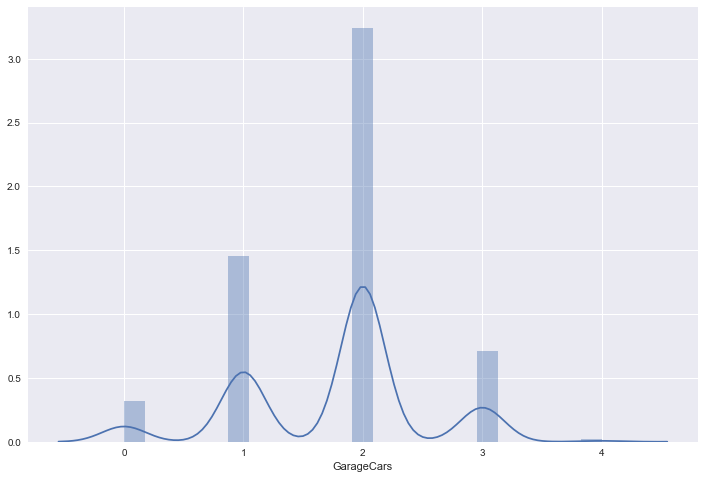

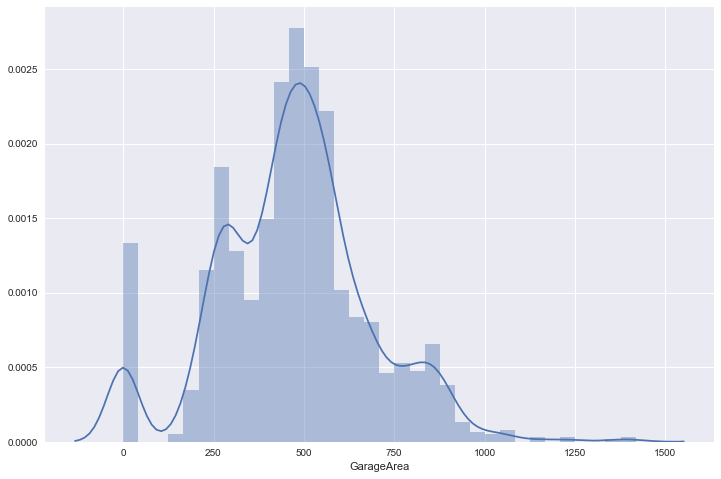

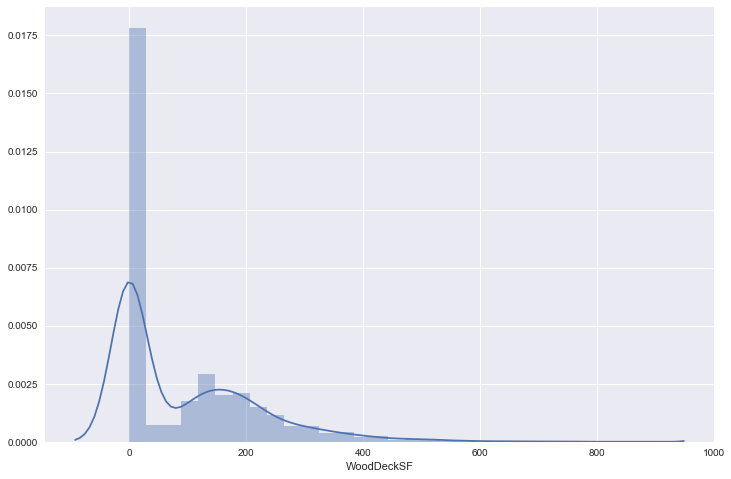

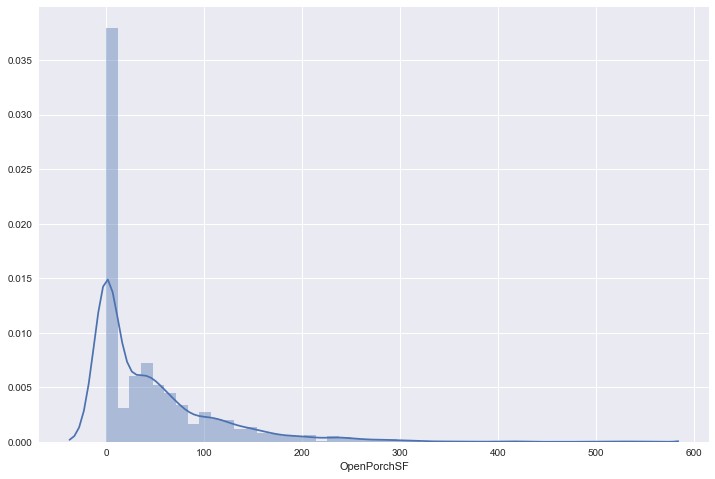

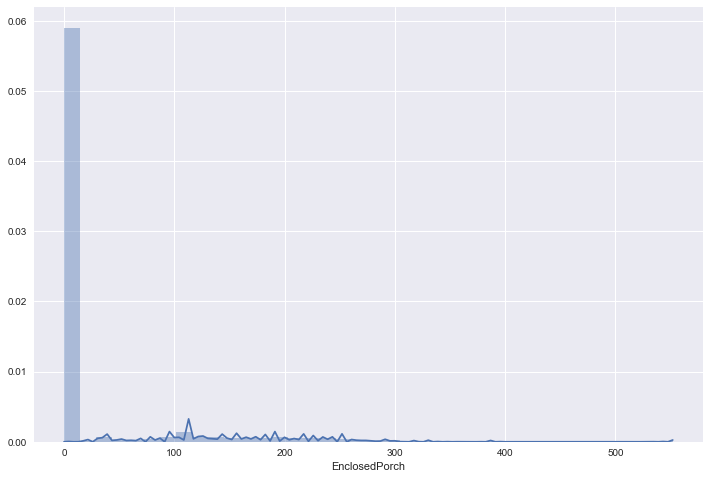

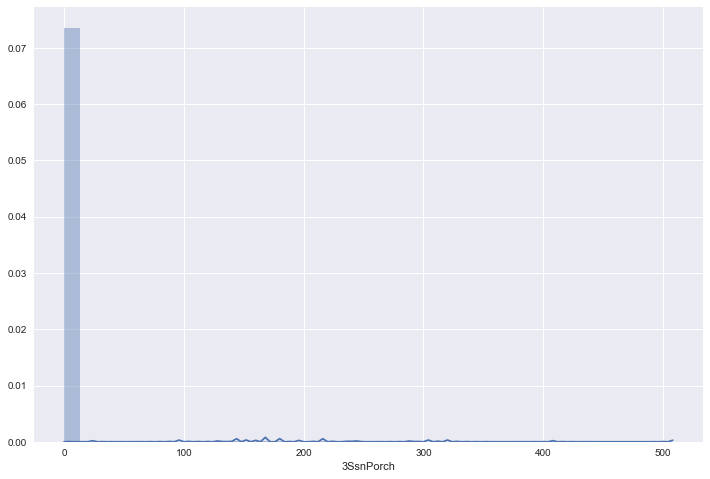

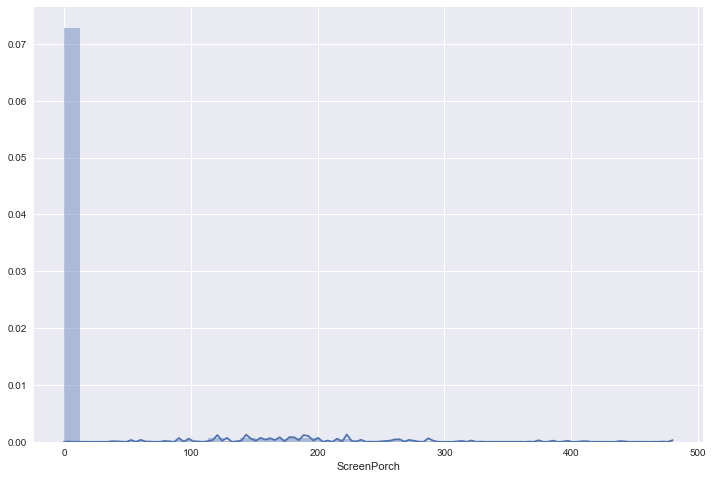

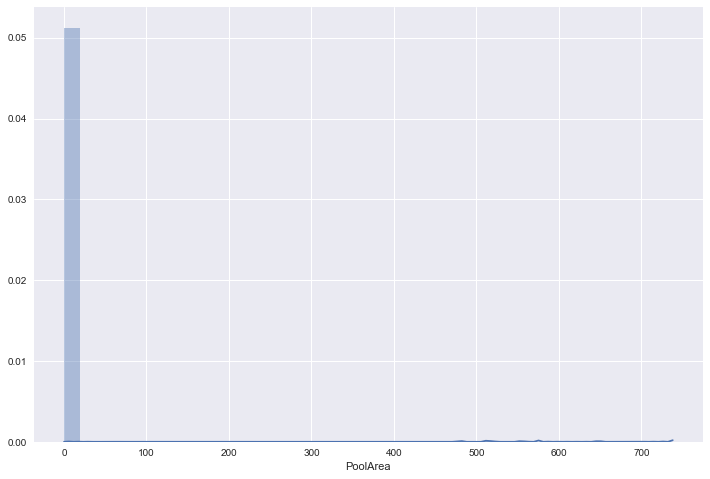

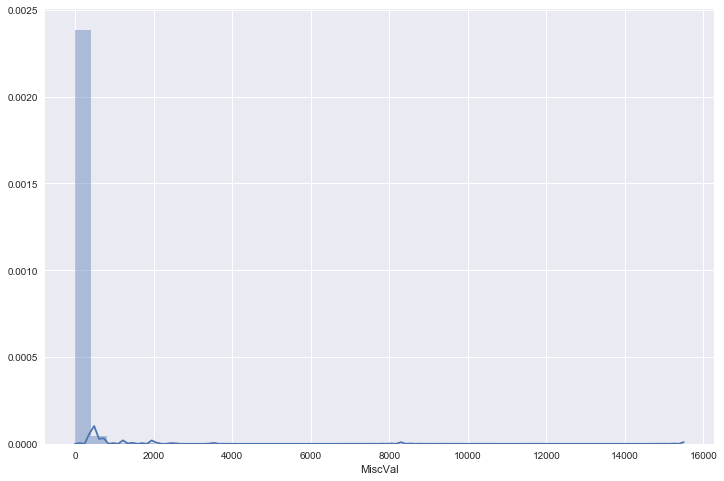

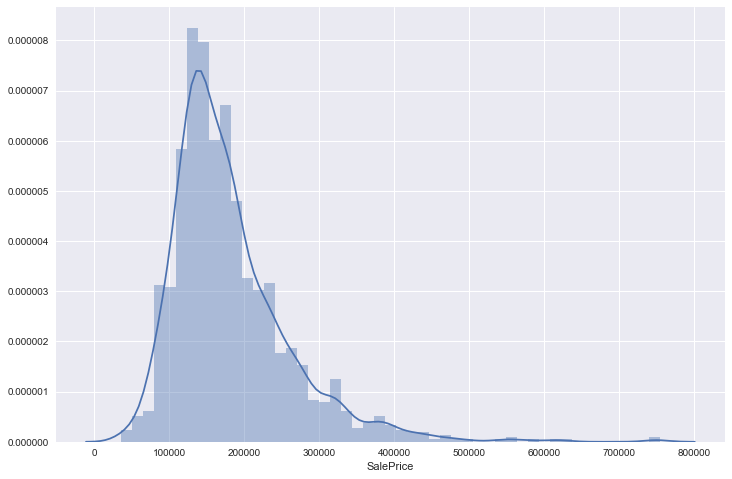

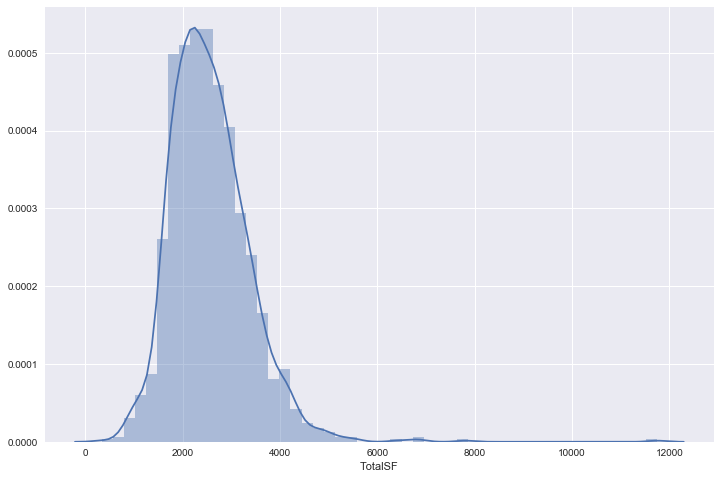

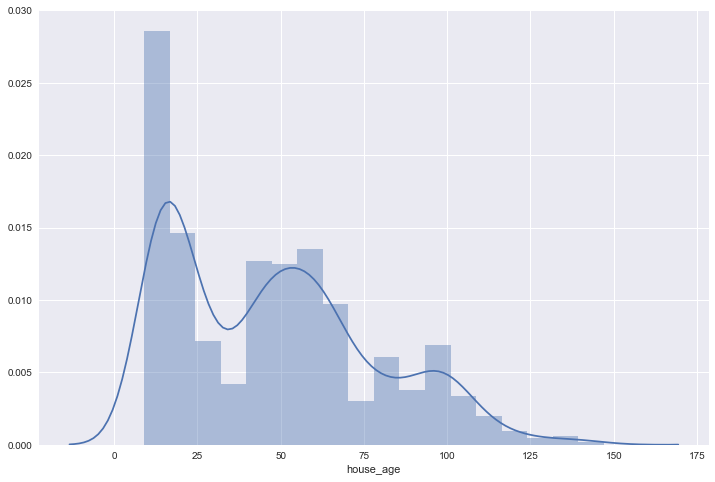

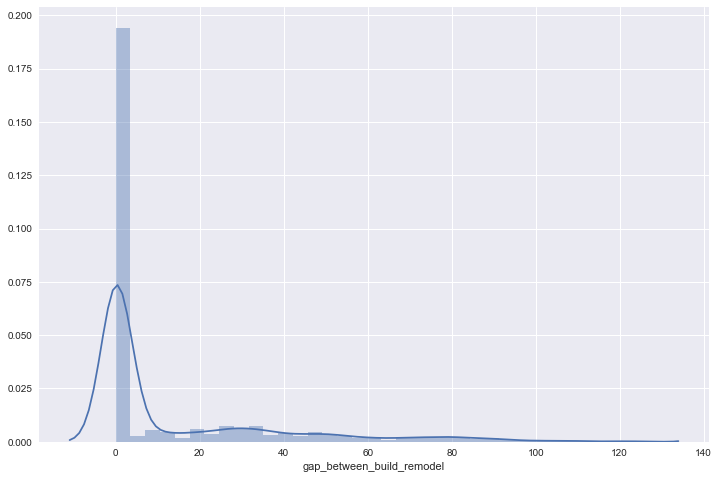

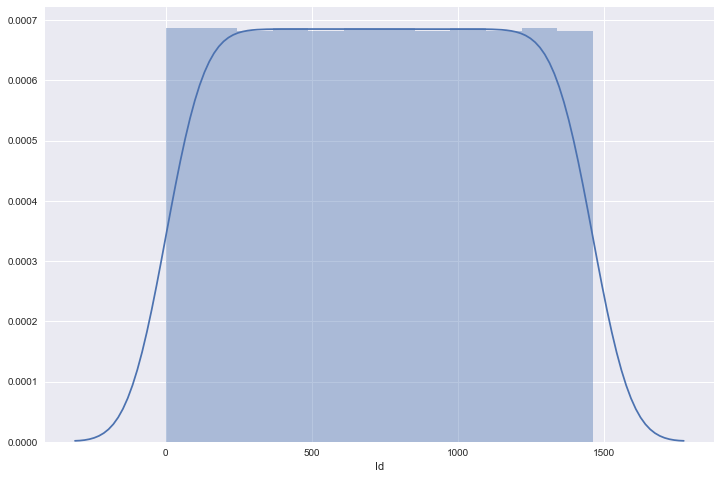

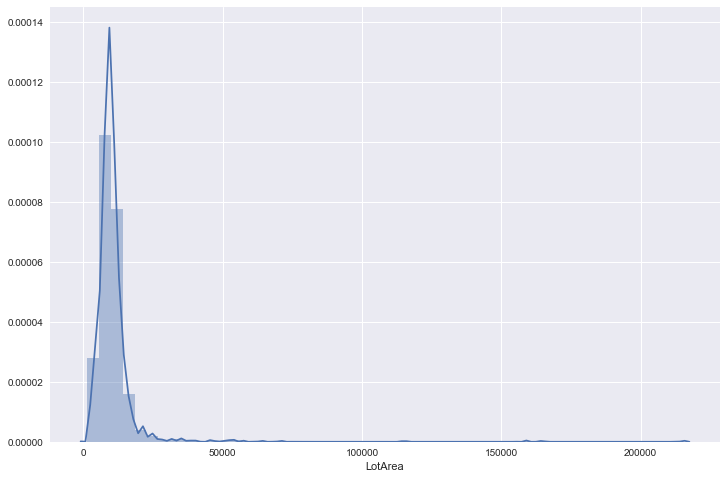

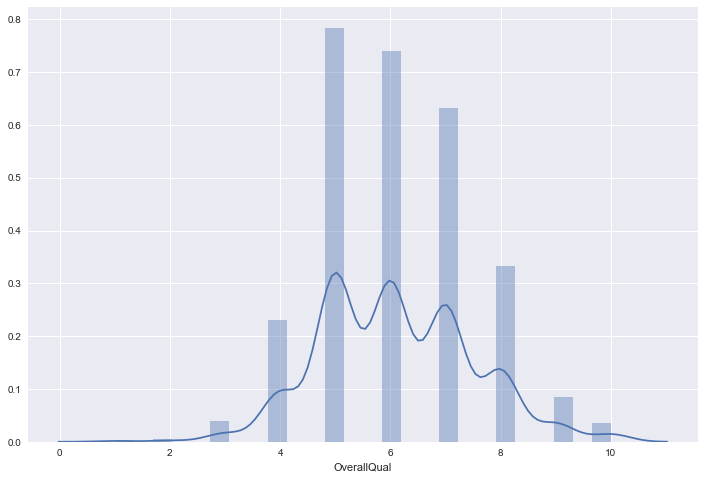

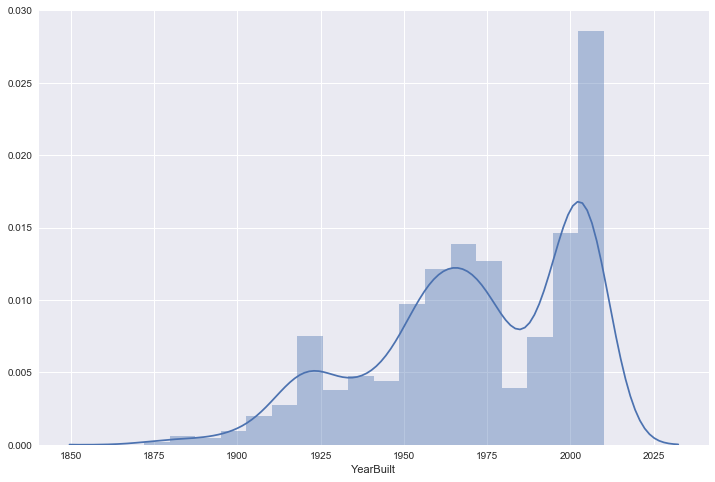

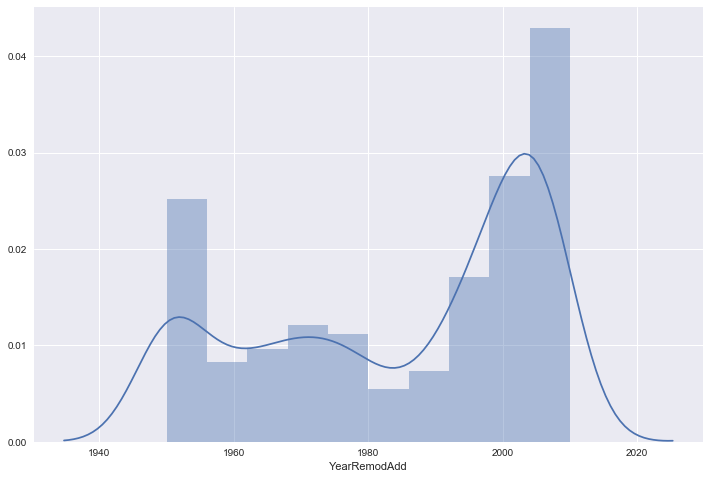

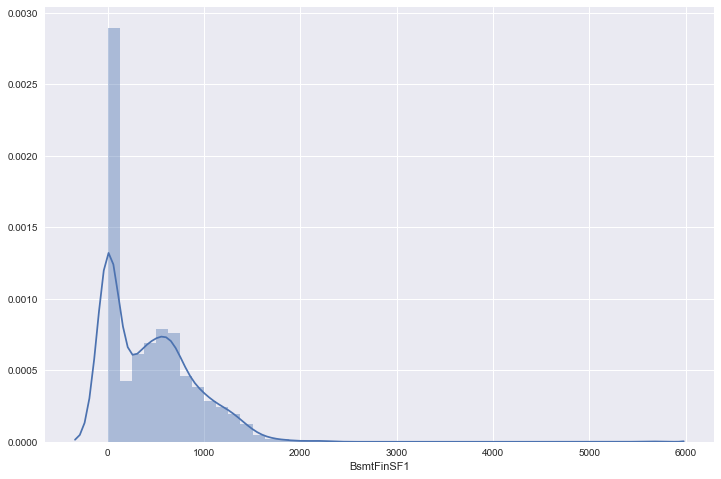

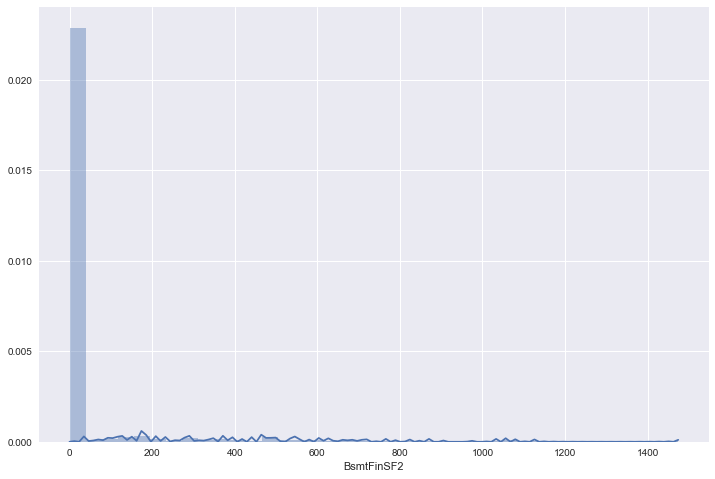

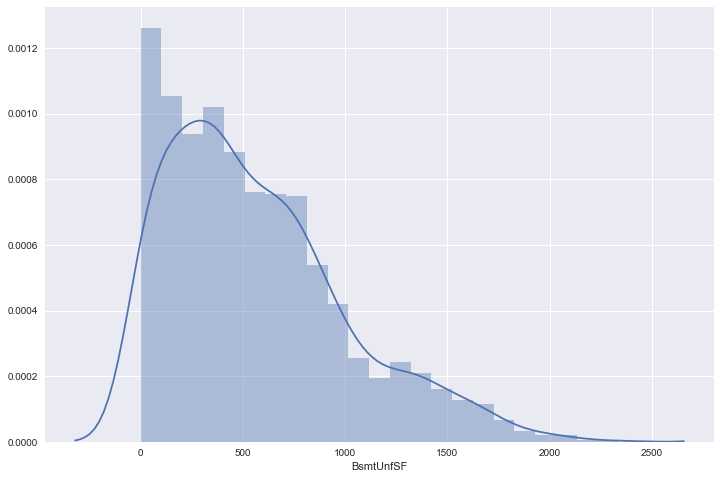

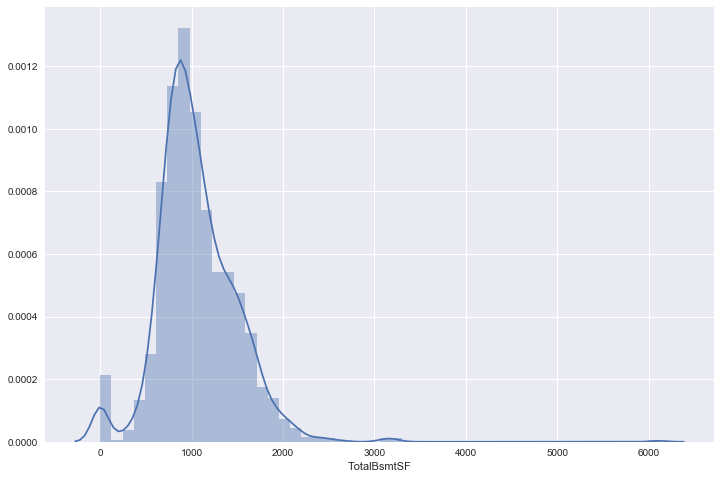

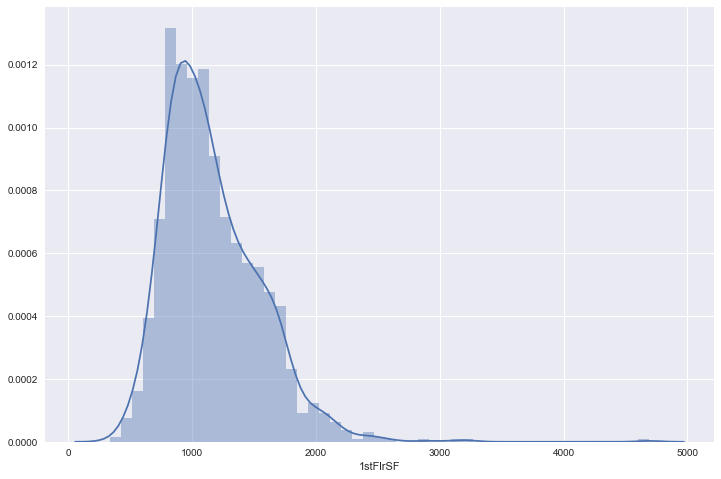

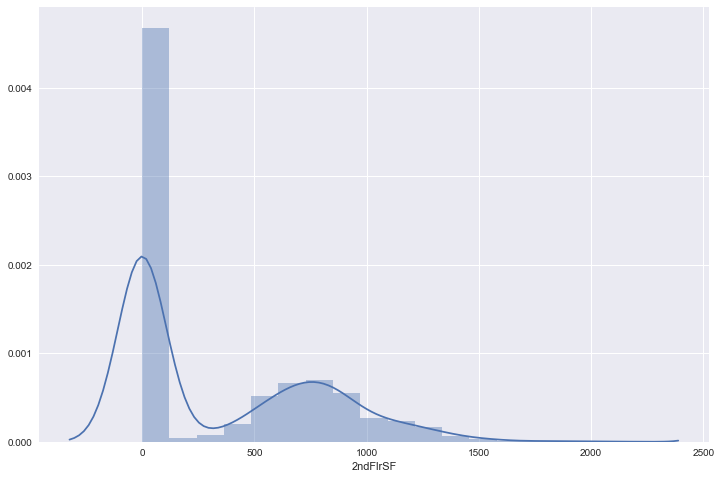

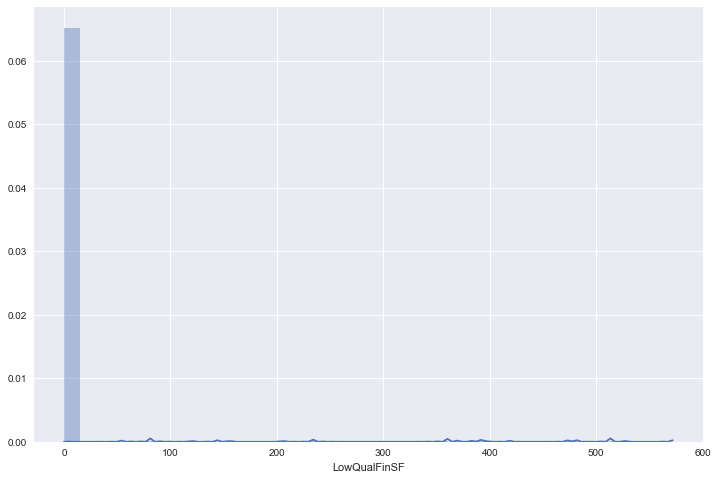

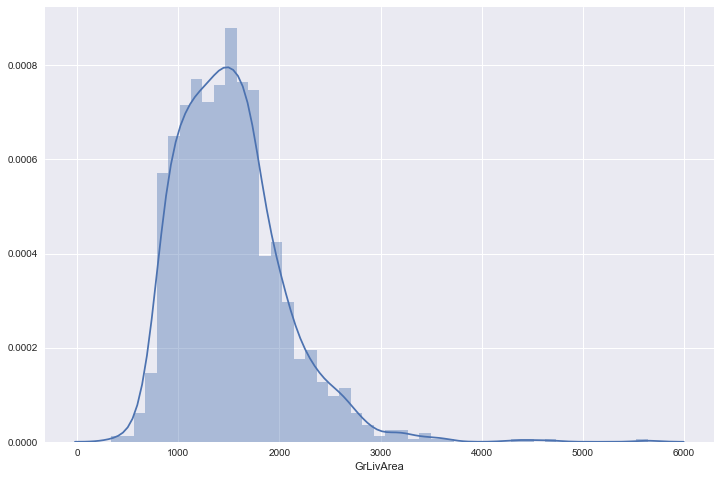

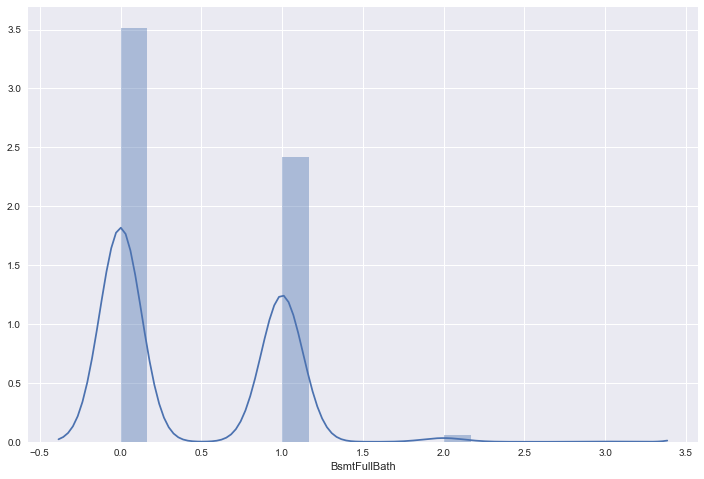

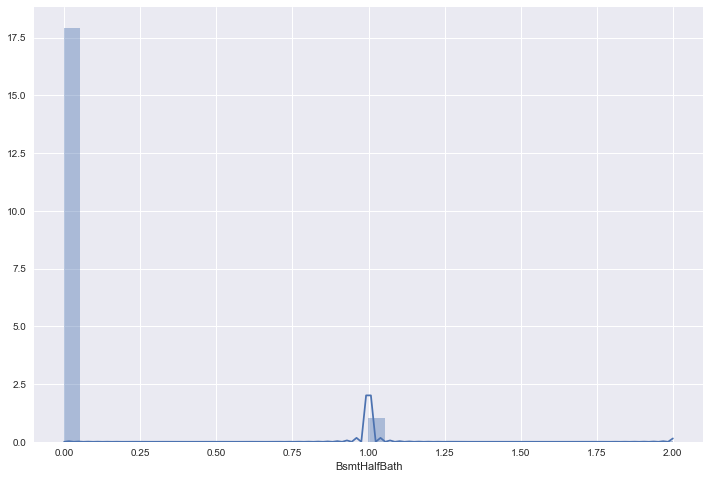

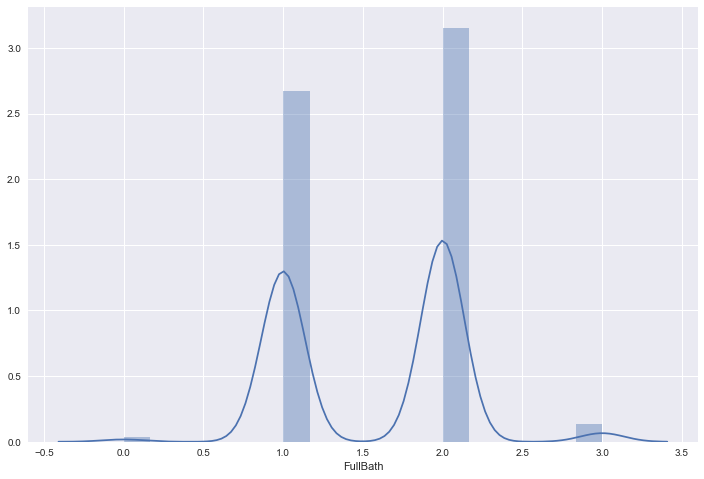

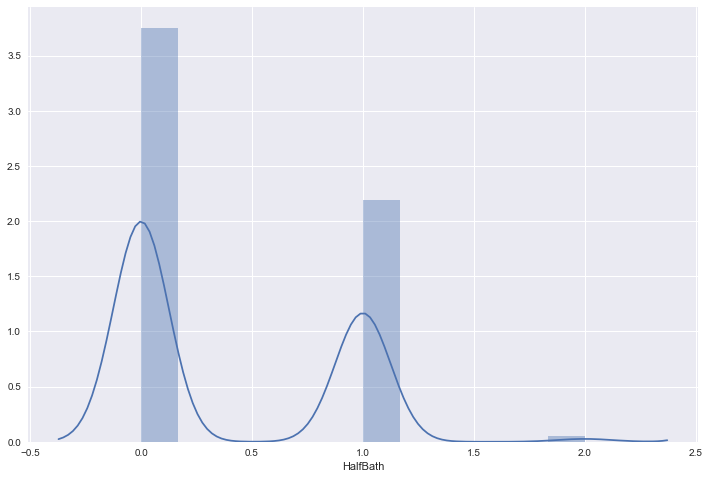

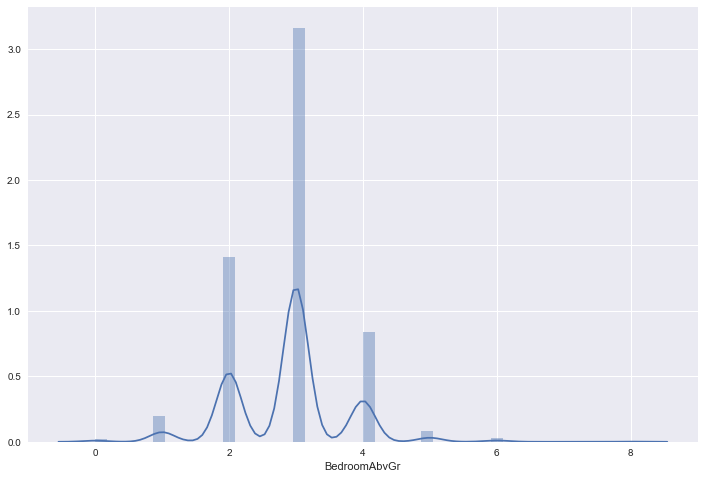

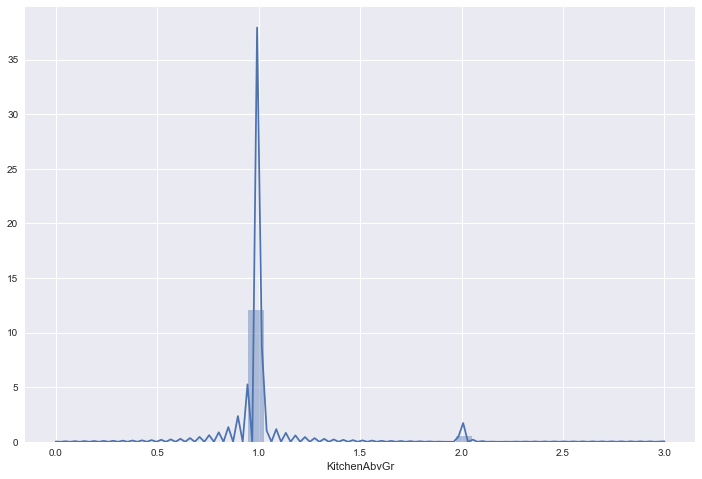

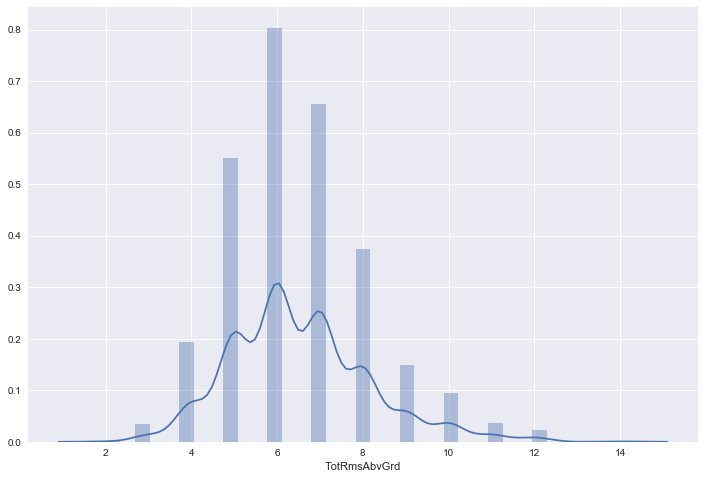

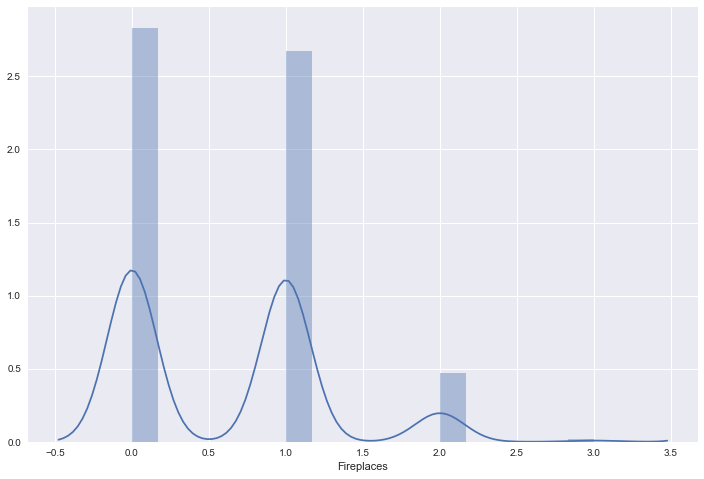

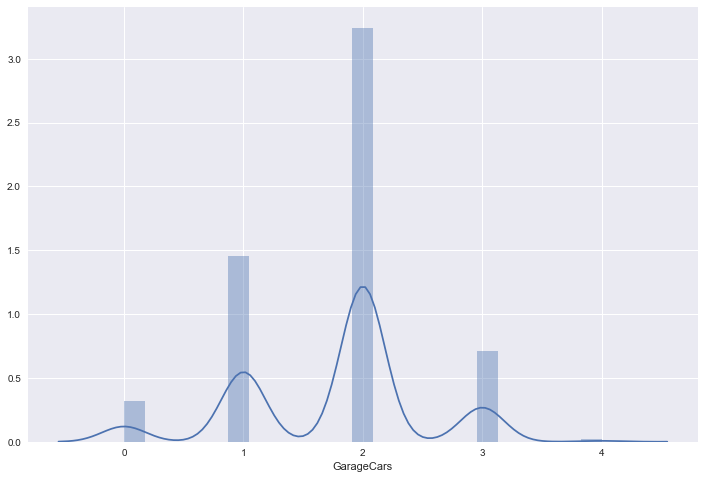

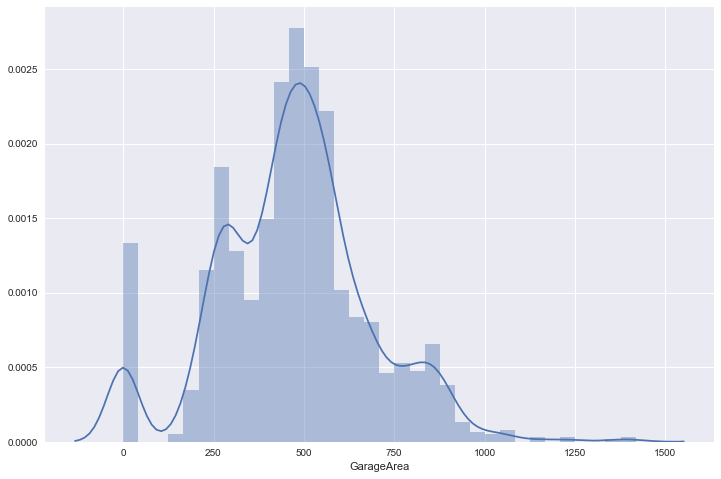

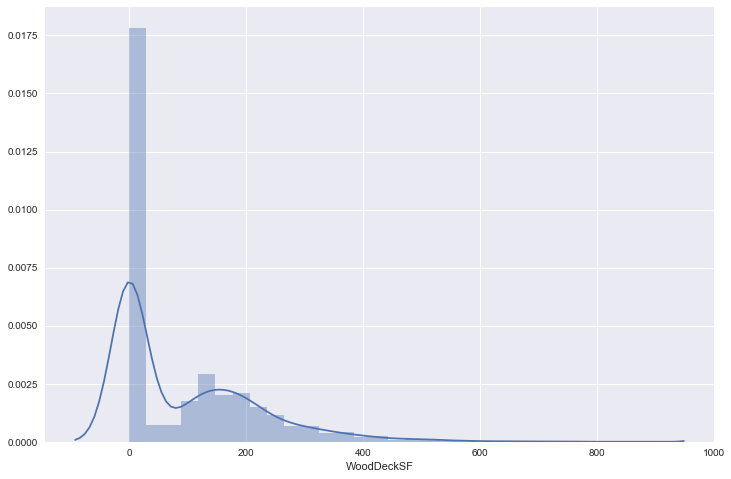

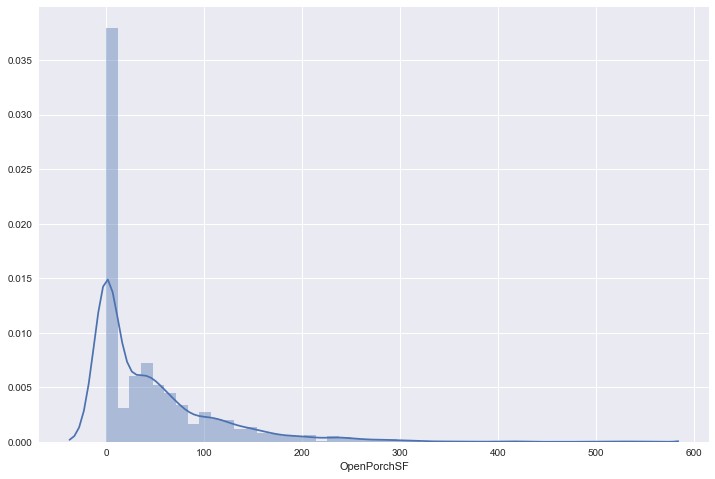

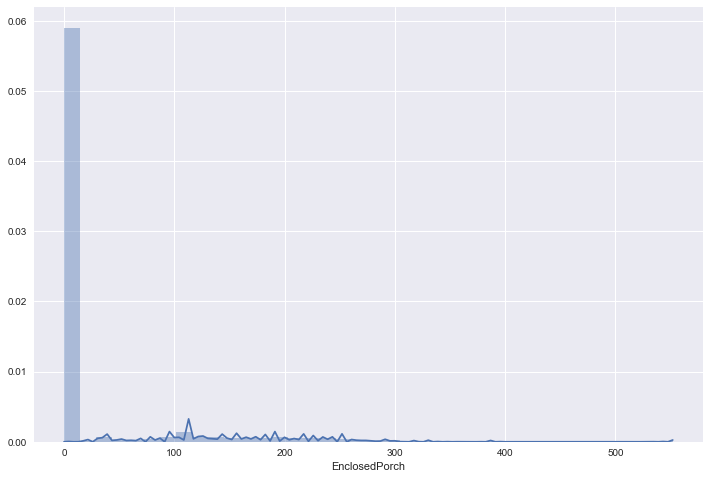

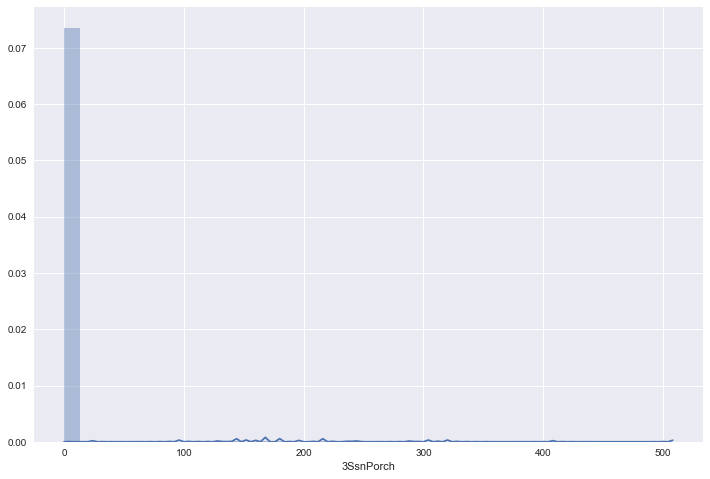

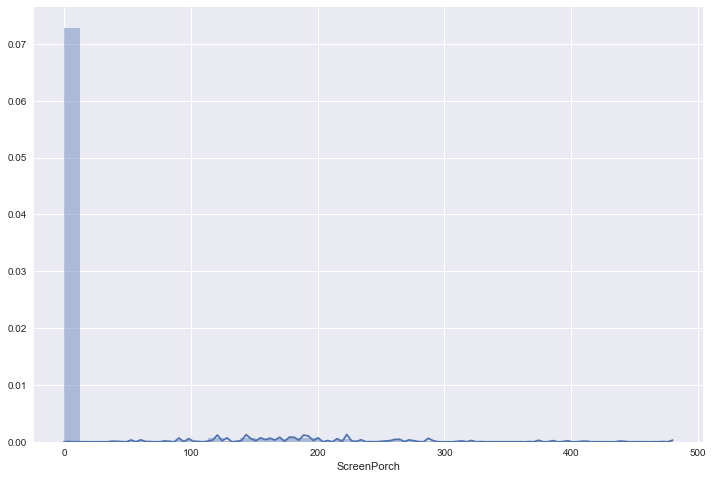

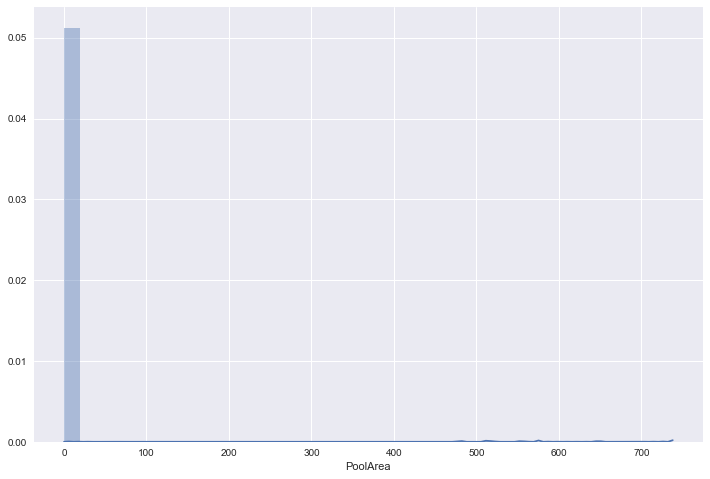

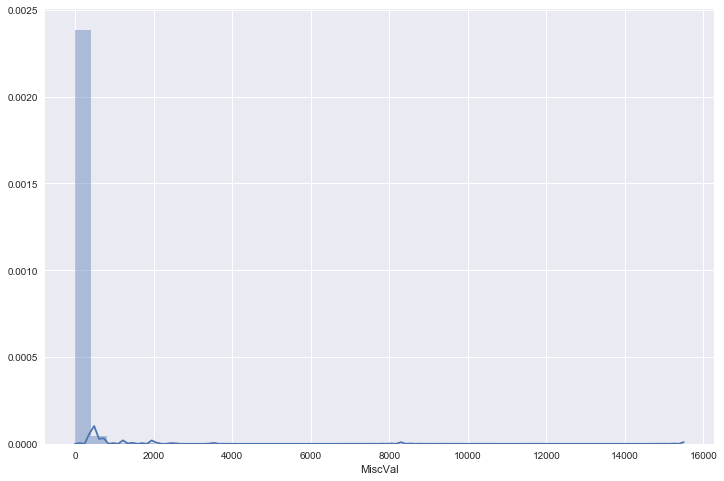

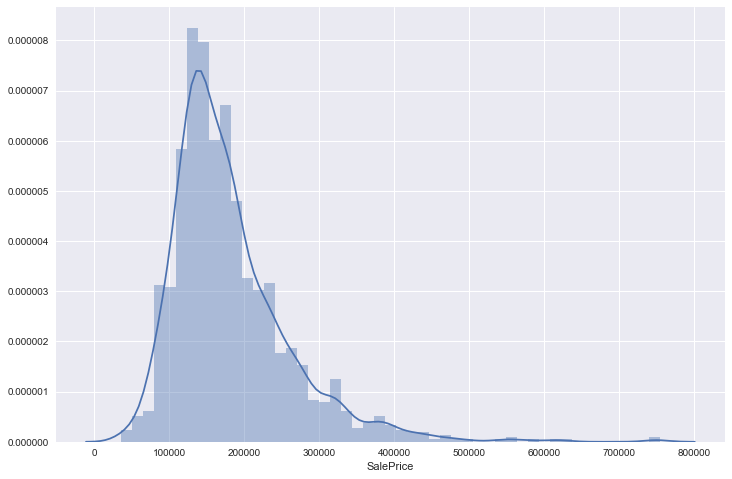

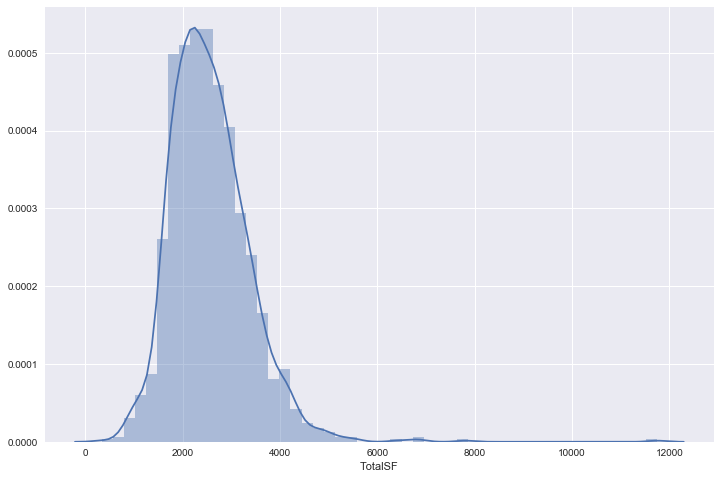

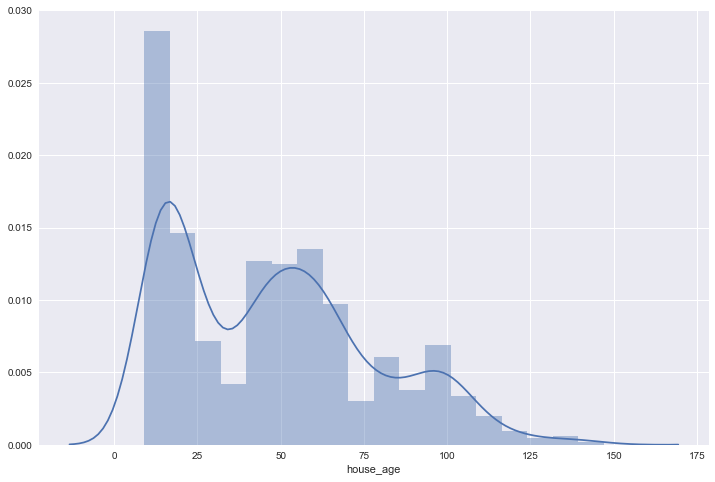

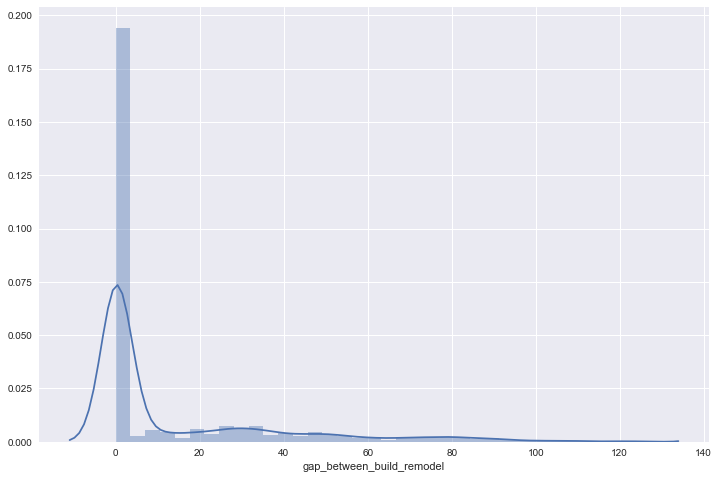

In [47]:
for col in house_numeric.columns:
    plt.figure(figsize=(12,8))
    sns.distplot(dfHouse[col])
    plt.show()

In [48]:
#These are the columns form the above distplot that doesnot follow normal distribution, lets drop few of them
#'GarageYrBlt','YearBuilt','YrSold','YearRemodAdd','MoSold','2ndFlrSF','BsmtFullBath','FullBath','HalfBath','Fireplaces','GarageCars'
house_numeric.drop(['YearBuilt', 'YearRemodAdd','Fireplaces'], axis=1,inplace=True)
house_numeric.head()

Id  LotArea  OverallQual  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0   1     8450            7         706           0        150          856   
1   2     9600            6         978           0        284         1262   
2   3    11250            7         486           0        434          920   
3   4     9550            7         216           0        540          756   
4   5    14260            8         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  GarageCars  \
0         2         1             3             1             8           2   
1         2         0             3             1             6           2   
2         2         1             3             1             6           2   
3         1         0             3             1             7           3   
4         2         1             4             1             9           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  SalePrice  TotalSF  house_age  gap_between_build_remodel  
0         0        0     208500     2566         16                          0  
1         0        0     181500     2524         43                          0  
2         0        0     223500     2706         18                          1  
3         0        0     140000     2473        104                         55  
4         0        0     250000     3343         19                          0

In [49]:
house_numeric.shape

(1459, 31)

#### Outlier Analysis

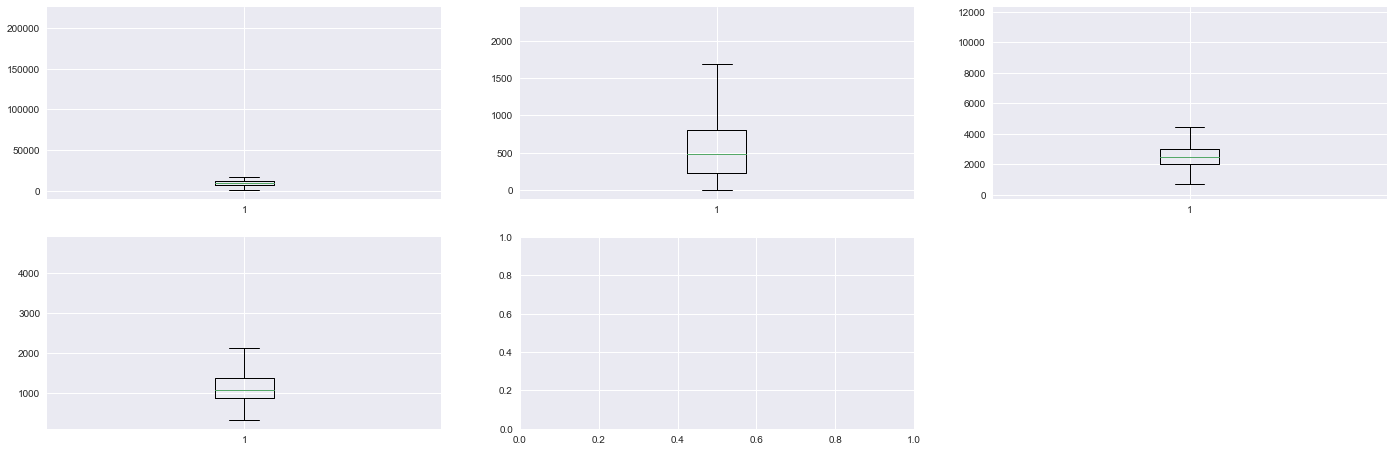

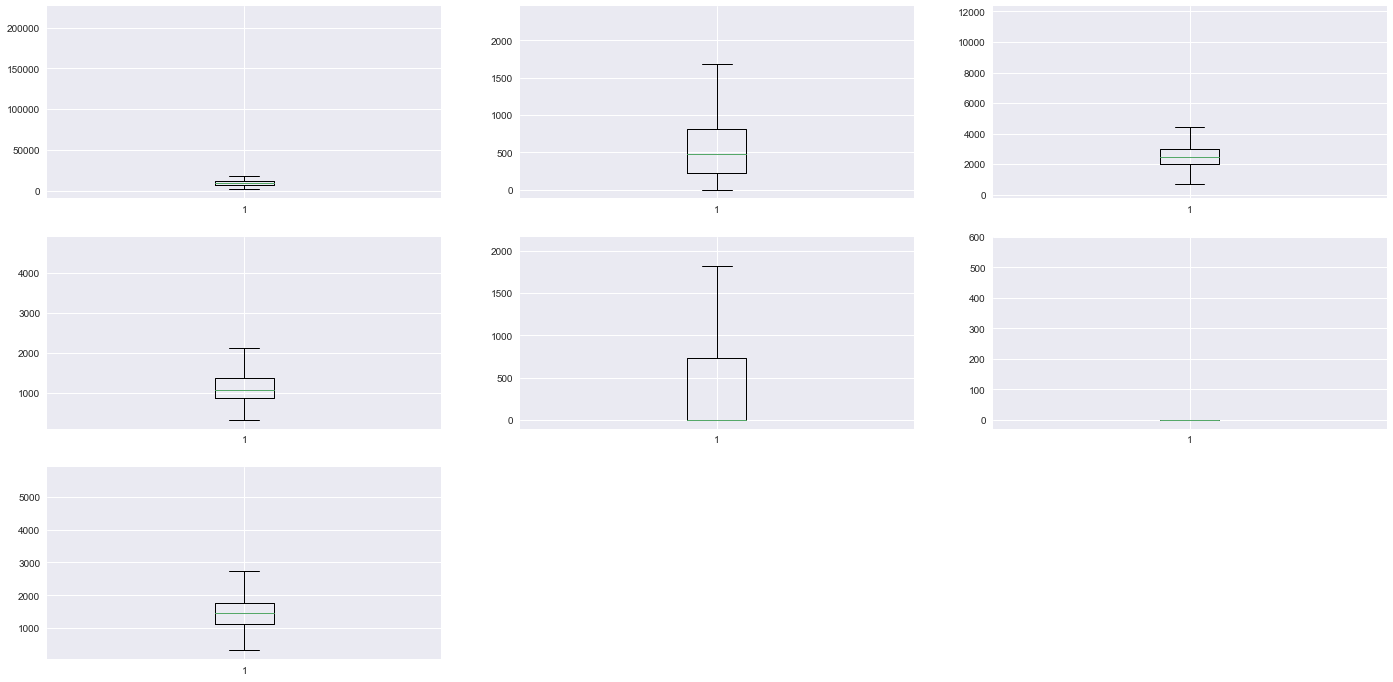

In [54]:
#boxplots for numeric varaibles
plt.figure(figsize=(24, 12))
plt.subplot(3,3,1)
plt.boxplot(dfHouse.LotArea)
plt.subplot(3,3,2)
plt.boxplot(dfHouse.BsmtUnfSF)
plt.subplot(3,3,3)
plt.boxplot(dfHouse.TotalSF)
plt.subplot(3,3,4)
plt.boxplot(dfHouse['1stFlrSF'])
plt.subplot(3,3,5)
plt.boxplot(dfHouse['2ndFlrSF'])
plt.subplot(3,3,6)
plt.boxplot(dfHouse.LowQualFinSF)
plt.subplot(3,3,7)
plt.boxplot(dfHouse.GrLivArea)
plt.show()

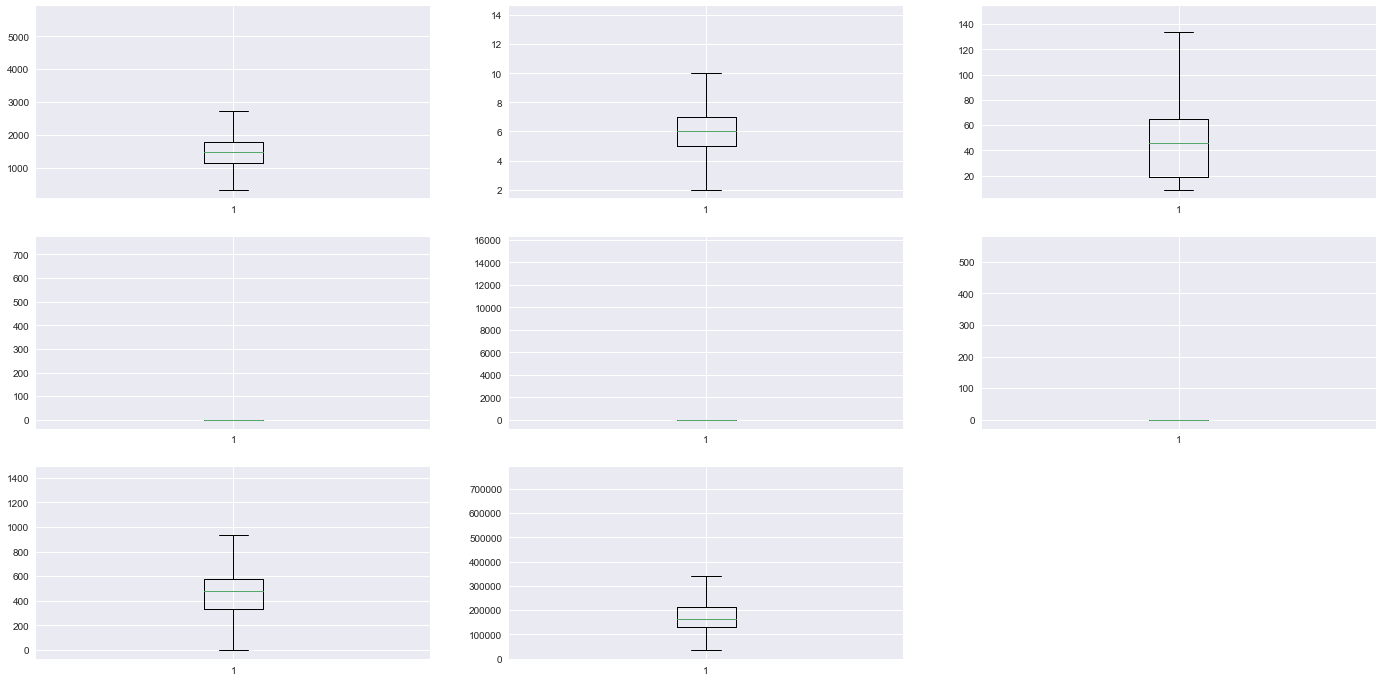

In [58]:
#boxplots for numeric variables
plt.figure(figsize=(24, 12))
plt.subplot(3,3,1)
plt.boxplot(dfHouse.GrLivArea)
plt.subplot(3,3,2)
plt.boxplot(dfHouse.TotRmsAbvGrd)
plt.subplot(3,3,3)
plt.boxplot(dfHouse.house_age)
plt.subplot(3,3,4)
plt.boxplot(dfHouse.PoolArea)
plt.subplot(3,3,5)
plt.boxplot(dfHouse.MiscVal)
plt.subplot(3,3,6)
plt.boxplot(dfHouse.EnclosedPorch)
plt.subplot(3,3,7)
plt.boxplot(dfHouse.GarageArea)
plt.subplot(3,3,8)
plt.boxplot(dfHouse.SalePrice)
plt.show()

In [61]:
#since data available is very less we will treat the outliers only for few variables
# outlier treatment for LotArea
Q1 = dfHouse.LotArea.quantile(0.25)
Q3 = dfHouse.LotArea.quantile(0.75)
IQR = Q3 - Q1
dfHouse = dfHouse[(dfHouse.LotArea >= Q1 - 1.5*IQR) & (dfHouse.LotArea <= Q3 + 1.5*IQR)]

In [62]:
Q1 = dfHouse.PoolArea.quantile(0.25)
Q3 = dfHouse.PoolArea.quantile(0.75)
IQR = Q3 - Q1
dfHouse = dfHouse[(dfHouse.PoolArea >= Q1 - 1.5*IQR) & (dfHouse.PoolArea <= Q3 + 1.5*IQR)]

In [65]:
Q1 = dfHouse.MiscVal.quantile(0.25)
Q3 = dfHouse.MiscVal.quantile(0.75)
IQR = Q3 - Q1
dfHouse = dfHouse[(dfHouse.MiscVal >= Q1 - 1.5*IQR) & (dfHouse.MiscVal <= Q3 + 1.5*IQR)]

In [66]:
dfHouse.shape

(1340, 66)

In [67]:
# split into X and y
X = dfHouse.drop(['SalePrice'], axis=1)
y = dfHouse['SalePrice']

#### Converting the categorical columns by creating dummy variables

In [68]:
#replacing with binary values 
dfHouse["CentralAir"]=dfHouse["CentralAir"].map({'Y': 1, "N": 0})

In [69]:
#lets include the categorical columns
dfHouse_categorical_df=X.select_dtypes(include=['object'])

In [71]:
dfHouse_categorical_df.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
       'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'PavedDrive', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [73]:
#creating dummy variables for categorical columns
house_df_dummies = pd.get_dummies(dfHouse_categorical_df, drop_first=True)
house_df_dummies.head()

MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1                 0                  0              0   
4                1                 0                  0              1   

   LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
0              0                 1              0              0   
1              0                 0              0              0   
2              0                 1              0              0   
3              0                 0              0              0   
4              0                 0              0              0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_

In [74]:
# dropping the original categorical variables after creating dummies
X = X.drop(list(dfHouse_categorical_df.columns), axis=1)

In [75]:
# concat dummy variables with X
X = pd.concat([X, house_df_dummies], axis=1)

In [76]:
X.shape

(1340, 222)

In [77]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_var = X.columns
X[scale_var] = scaler.fit_transform(X[scale_var])

In [78]:
X.describe()

Id       LotArea   OverallQual     YearBuilt  YearRemodAdd  \
count  1.340000e+03  1.340000e+03  1.340000e+03  1.340000e+03  1.340000e+03   
mean   2.369580e-16  2.599496e-17  3.612367e-17 -1.076937e-15  1.491759e-15   
std    1.000373e+00  1.000373e+00  1.000373e+00  1.000373e+00  1.000373e+00   
min   -1.732942e+00 -2.405625e+00 -3.712225e+00 -3.290023e+00 -1.702365e+00   
25%   -8.656518e-01 -5.713169e-01 -8.053549e-01 -5.909149e-01 -8.815053e-01   
50%   -7.326149e-04  2.166140e-03 -7.863735e-02  8.386197e-02  4.222130e-01   
75%    8.665578e-01  6.200914e-01  6.480802e-01  9.643636e-01  9.050717e-01   
max    1.726734e+00  2.618440e+00  2.828233e+00  1.252378e+00  1.194787e+00   

         BsmtFinSF1    BsmtFinSF2     BsmtUnfSF   TotalBsmtSF      1stFlrSF  \
count  1.340000e+03  1.340000e+03  1.340000e+03  1.340000e+03  1.340000e+03   
mean  -1.067968e-16  8.848643e-17 -6.097941e-17 -2.600739e-16  2.103624e-16   
std    1.000373e+00  1.000373e+00  1.000373e+00  1.000373e+00  1.000373e+00   
min   -1.008048e+00 -2.815068e-01 -1.287106e+00 -2.557614e+00 -2.233690e+00   
25%   -1.008048e+00 -2.815068e-01 -7.719968e-01 -6.165511e-01 -7.461897e-01   
50%   -1.290131e-01 -2.815068e-01 -2.008367e-01 -1.482292e-01 -1.936110e-01   
75%    6.408758e-01 -2.815068e-01  5.244637e-01  5.594437e-01  6.108886e-01   
max    4.127674e+00  9.224750e+00  3.950303e+00  5.272582e+00  5.712460e+00   

           2ndFlrSF  LowQualFinSF     GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  1.340000e+03  1.340000e+03  1.340000e+03  1.340000e+03  1.340000e+03   
mean  -1.033999e-16 -1.039591e-16 -2.367923e-16  2.336439e-16 -3.002988e-16   
std    1.000373e+00  1.000373e+00  1.000373e+00  1.000373e+00  1.000373e+00   
min   -7.986850e-01 -1.113165e-01 -2.409511e+00 -8.135776e-01 -2.351352e-01   
25%   -7.986850e-01 -1.113165e-01 -7.608016e-01 -8.135776e-01 -2.351352e-01   
50%   -7.986850e-01 -1.113165e-01 -7.310176e-02 -8.135776e-01 -2.351352e-01   
75%    9.163076e-01 -1.113165e-01  5.651420e-01  1.157840e+00 -2.351352e-01   
max    3.000357e+00  1.186901e+01  4.072880e+00  5.100675e+00  8.280572e+00   

           FullBath      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
count  1.340000e+03  1.340000e+03  1.340000e+03  1.340000e+03  1.340000e+03   
mean   2.584997e-17  1.159935e-18  1.415741e-16 -2.949548e-16  2.810356e-16   
std    1.000373e+00  1.000373e+00  1.000373e+00  1.000373e+00  1.000373e+00   
min   -2.903220e+00 -7.579256e-01 -3.550143e+00 -4.745703e+00 -2.824175e+00   
25%   -1.044493e+00 -7.579256e-01 -1.064023e+00 -2.098671e-01 -9.319778e-01   
50%    8.142332e-01 -7.579256e-01  1.790378e-01 -2.098671e-01 -3.012454e-01   
75%    8.142332e-01  1.233487e+00  1.790378e-01 -2.098671e-01  3.294871e-01   
max    2.672960e+00  3.224899e+00  6.394339e+00  8.861806e+00  4.744614e+00   

         Fireplaces    GarageCars    GarageArea    WoodDeckSF   OpenPorchSF  \
count  1.340000e+03  1.340000e+03  1.340000e+03  1.340000e+03  1.340000e+03   
mean  -3.285929e-16  3.642194e-16 -9.652312e-17  3.208047e-16 -1.227045e-16   
std    1.000373e+00  1.000373e+00  1.000373e+00  1.000373e+00  1.000373e+00   
min   -9.348956e-01 -2.336435e+00 -2.213553e+00 -7.558947e-01 -7.271347e-01   
25%   -9.348956e-01 -1.006998e+00 -7.145444e-01 -7.558947e-01 -7.271347e-01   
50%    6.650534e-01  3.224379e-01  3.555039e-02 -7.558947e-01 -3.245197e-01   
75%    6.650534e-01  3.224379e-01  5.080510e-01  6.493034e-01  3.558996e-01   
max    3.864951e+00  2.981311e+00  4.354206e+00  5.455672e+00  7.695571e+00   

       EnclosedPorch     3SsnPorch   ScreenPorch  PoolArea  MiscVal  \
count   1.340000e+03  1.340000e+03  1.340000e+03    1340.0   1340.0   
mean   -2.319869e-18  1.151235e-16  1.597396e-16       0.0      0.0   
std     1.000373e+00  1.000373e+00  1.000373e+00       0.0      0.0   
min    -3.612732e-01 -1.064806e-01 -2.690175e-01       0.0      0.0   
25%    -3.612732e-01 -1.064806e-01 -2.690175e-01       0.0      0.0   
50%    -3.612732e-01 -1.064806e

#### Model Building

In [79]:
# split data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, 
                                                    test_size = 0.3, 
                                                    random_state = 100)

#### Linear Regression

In [82]:
# let's build a Linear regression model first
from sklearn import metrics
# linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.94084729000355627

In [83]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-1.5127876492265758e+22

In [84]:
lm.intercept_

-162309006364019.47

In [85]:
# model coefficients
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x,3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -162309006364019.47),
 ('Id', -9.3170000000000002),
 ('LotArea', 6461.692),
 ('OverallQual', 8234.1880000000001),
 ('YearBuilt', 66847011917976872.0),
 ('YearRemodAdd', -32747034362056876.0),
 ('BsmtFinSF1', -7279109057786843.0),
 ('BsmtFinSF2', -2649234420838881.0),
 ('BsmtUnfSF', -7620593617110217.0),
 ('TotalBsmtSF', 15134248512607116.0),
 ('1stFlrSF', 26132710334114060.0),
 ('2ndFlrSF', 30427354191182572.0),
 ('LowQualFinSF', 2286287724431092.5),
 ('GrLivArea', -24912049346931392.0),
 ('BsmtFullBath', 757.5),
 ('BsmtHalfBath', -393.0),
 ('FullBath', 2199.0),
 ('HalfBath', 1306.0),
 ('BedroomAbvGr', -3323.75),
 ('KitchenAbvGr', -2404.5),
 ('TotRmsAbvGrd', 2200.0),
 ('Fireplaces', 2520.0),
 ('GarageCars', 3256.0),
 ('GarageArea', 2535.0),
 ('WoodDeckSF', 1383.0),
 ('OpenPorchSF', 1012.0),
 ('EnclosedPorch', 1453.5),
 ('3SsnPorch', 211.0),
 ('ScreenPorch', 1065.0),
 ('PoolArea', -1889535548285808.3),
 ('MiscVal', 2385422132602747.0),
 ('TotalSF', -14722204824885624.0),
 

It is clearly visible that the model is overfit since the tarining accracy is very high compared to test data

In [86]:
#Importing the lasso and ridge regressions
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

#### Lasso Regression

In [87]:
# lasso regression without tuning hyper parameter
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.940842651988
0.895075790503


In [88]:
# lasso model parameters without tuning hyper parameter
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x,3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 180011.641),
 ('Id', -26.652999999999999),
 ('LotArea', 6546.2839999999997),
 ('OverallQual', 8321.6219999999994),
 ('YearBuilt', 28154.499),
 ('YearRemodAdd', 5907.3500000000004),
 ('BsmtFinSF1', 19377.669999999998),
 ('BsmtFinSF2', 5804.6310000000003),
 ('BsmtUnfSF', 10067.663),
 ('TotalBsmtSF', 6560.8990000000003),
 ('1stFlrSF', 23111.062999999998),
 ('2ndFlrSF', 27664.189999999999),
 ('LowQualFinSF', 2123.415),
 ('GrLivArea', 5652.0659999999998),
 ('BsmtFullBath', 762.58600000000001),
 ('BsmtHalfBath', -405.55599999999998),
 ('FullBath', 2171.6849999999999),
 ('HalfBath', 1314.9929999999999),
 ('BedroomAbvGr', -3311.7979999999998),
 ('KitchenAbvGr', -2384.529),
 ('TotRmsAbvGrd', 2181.3690000000001),
 ('Fireplaces', 2558.4059999999999),
 ('GarageCars', 3287.3229999999999),
 ('GarageArea', 2487.2190000000001),
 ('WoodDeckSF', 1382.8399999999999),
 ('OpenPorchSF', 1008.037),
 ('EnclosedPorch', 1470.431),
 ('3SsnPorch', 197.214),
 ('ScreenPorch', 1053.5730000000001),
 ('P

Lets deal with the hyperparameter

In [89]:
# Now let's do k fold with r2 score and tune hyper parameter
from sklearn.model_selection import KFold

folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]}

model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   14.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [90]:
# results data frame 
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.111906         0.000399         0.888081          0.944802   
1       0.101729         0.000399         0.888083          0.944802   
2       0.103513         0.000599         0.888100          0.944802   
3       0.134438         0.000399         0.888174          0.944802   
4       0.106314         0.000399         0.888261          0.944802   

  param_alpha             params  rank_test_score  split0_test_score  \
0      0.0001  {'alpha': 0.0001}               27           0.875623   
1       0.001   {'alpha': 0.001}               26           0.875624   
2        0.01    {'alpha': 0.01}               25           0.875631   
3        0.05    {'alpha': 0.05}               24           0.875663   
4         0.1     {'alpha': 0.1}               23           0.875702   

   split0_train_score  split1_test_score  split1_train_score  \
0            0.948568           0.907967            0.941609   
1            0.948568           0.907967            0.941609   
2            0.948568           0.907967            0.941609   
3            0.948568           0.907966            0.941609   
4            0.948568           0.907962            0.941609   

   split2_test_score  split2_train_score  split3_test_score  \
0           0.893246            0.944792           0.885711   
1           0.893246            0.944792           0.885715   
2           0.893249            0.944792           0.885758   
3           0.893262            0.944792           0.885940   
4           0.893277            0.944792           0.886156   

   split3_train_score  split4_test_score  split4_train_score  std_fit_time  \
0            0.943356           0.877819            0.945687      0.021027   
1            0.943356           0.877822            0.945687      0.010056   
2            0.943356           0.877855            0.945687      0.014631   
3            0.943356           0.878001            0.945687      0.046747   
4            0.943356           0.878171            0.945687      0.013900   

   std_score_time  std_test_score  std_train_score  
0        0.000489        0.011745         0.002335  
1        0.000489        0.011744         0.002335  
2        0.000489        0.011735         0.002335  
3        0.000489        0.011697         0.002335  
4        0.000489        0.011651         0.002335

In [91]:
model_cv.best_params_

{'alpha': 200}

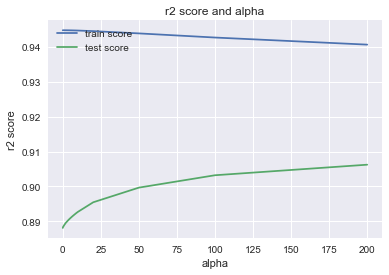

In [92]:
#plotting the values of r2 score to choose the optimal value of alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [93]:
# Now let's do k fold with neg_mean_absolute_error score and tune hyper parameter
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]}
lasso = Lasso()

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   13.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [94]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.117293         0.000400    -17751.699853     -12326.012705   
1       0.103328         0.000401    -17751.601671     -12326.011200   
2       0.100936         0.000200    -17750.621356     -12325.999809   
3       0.139819         0.000797    -17746.300365     -12325.967088   
4       0.103914         0.000399    -17741.030582     -12325.942959   

  param_alpha             params  rank_test_score  split0_test_score  \
0      0.0001  {'alpha': 0.0001}               27      -18643.526969   
1       0.001   {'alpha': 0.001}               26      -18643.482585   
2        0.01    {'alpha': 0.01}               25      -18643.038999   
3        0.05    {'alpha': 0.05}               24      -18641.076547   
4         0.1     {'alpha': 0.1}               23      -18638.637768   

   split0_train_score  split1_test_score  split1_train_score  \
0       -11960.767053      -16976.012894       -12453.372646   
1       -11960.765418      -16976.056406       -12453.372967   
2       -11960.751601      -16976.492117       -12453.377515   
3       -11960.699070      -16978.442782       -12453.393909   
4       -11960.642218      -16981.115112       -12453.417458   

   split2_test_score  split2_train_score  split3_test_score  \
0      -17618.618646       -12214.410087      -17430.176073   
1      -17618.546719       -12214.411101      -17429.892686   
2      -17617.830856       -12214.430946      -17427.061950   
3      -17614.704578       -12214.539032      -17414.531314   
4      -17610.896770       -12214.678976      -17398.963038   

   split3_train_score  split4_test_score  split4_train_score  std_fit_time  \
0       -12490.220948      -18089.543614       -12511.292790      0.018129   
1       -12490.219182      -18089.407843       -12511.287334      0.008244   
2       -12490.204272      -18088.050300       -12511.234709      0.010087   
3       -12490.191740      -18082.067895       -12511.011689      0.055363   
4       -12490.205561      -18074.803903       -12510.770582      0.009989   

   std_score_time  std_test_score  std_train_score  
0        0.000490      572.056512       211.363735  
1        0.000491      572.049926       211.363001  
2        0.000399      571.984629       211.354687  
3        0.000399      571.716054       211.322394  
4        0.000489      571.388596       211.290088

In [95]:
model_cv.best_params_

{'alpha': 200}

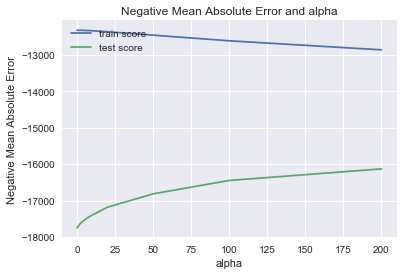

In [96]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [97]:
# model with optimal alpha = 200
lm = Lasso(alpha=200)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.937336911461
0.900363594891


In [98]:
# lasso model parameters with alpha = 200
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))
final_var=dict(zip(cols, model_parameters))
{k: v for k, v in sorted(final_var.items(), key=lambda item: item[1])}

{'1stFlrSF': 1662.655,
 '2ndFlrSF': 0.0,
 '3SsnPorch': -0.0,
 'BedroomAbvGr': -3331.2449999999999,
 'BldgType_2fmCon': -0.0,
 'BldgType_Duplex': -442.45499999999998,
 'BldgType_Twnhs': -1170.1030000000001,
 'BldgType_TwnhsE': -0.0,
 'BsmtFinSF1': 8883.1990000000005,
 'BsmtFinSF2': 1851.5139999999999,
 'BsmtFullBath': 806.298,
 'BsmtHalfBath': -497.93299999999999,
 'BsmtUnfSF': -0.0,
 'CentralAir_Y': -297.64299999999997,
 'Condition1_Feedr': -0.0,
 'Condition1_Norm': 2268.3130000000001,
 'Condition1_PosA': 91.266000000000005,
 'Condition1_PosN': 493.65499999999997,
 'Condition1_RRAe': -1896.3009999999999,
 'Condition1_RRAn': 418.33100000000002,
 'Condition1_RRNe': -11.819000000000001,
 'Condition1_RRNn': 147.79499999999999,
 'Condition2_Feedr': -275.60399999999998,
 'Condition2_Norm': 0.0,
 'Condition2_PosA': 493.63299999999998,
 'Condition2_PosN': -1112.481,
 'Condition2_RRAn': -0.0,
 'Condition2_RRNn': 0.0,
 'Electrical_FuseF': 0.0,
 'Electrical_FuseP': 0.0,
 'Electrical_Mix': 0.0,
 '

With optimal value of alpha=200 we got r2 values for training and test data as 0.93 and 0.90 which is good indication that model is not overfit

#### Ridge Regression

In [99]:
# ridge regression without tuning hyper parameter
lm = Ridge(alpha=0.001)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.940842702048
0.895208280148


In [100]:
# Now let's do k fold with r2 score and tune hyper parameter
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [101]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.007779         0.000598         0.882449          0.944988   
1       0.006384         0.000598         0.882514          0.944988   
2       0.006380         0.000798         0.886236          0.944925   
3       0.023936         0.000599         0.890774          0.944553   
4       0.008378         0.000399         0.893328          0.944073   

  param_alpha            params  rank_test_score  split0_test_score  \
0       0.001  {'alpha': 0.001}                5           0.895106   
1        0.01   {'alpha': 0.01}                4           0.895125   
2           1    {'alpha': 1.0}                3           0.896486   
3           5    {'alpha': 5.0}                2           0.899041   
4          10   {'alpha': 10.0}                1           0.901188   

   split0_train_score  split1_test_score  split1_train_score  \
0            0.941717           0.871297            0.948189   
1            0.941717           0.871310            0.948189   
2            0.941682           0.872525            0.948152   
3            0.941345           0.875173            0.947792   
4            0.940867           0.876822            0.947298   

   split2_test_score  split2_train_score  split3_test_score  \
0           0.894302            0.943582           0.864958   
1           0.894327            0.943582           0.865123   
2           0.896092            0.943537           0.874127   
3           0.899920            0.943194           0.883011   
4           0.902877            0.942712           0.887079   

   split3_train_score  split4_test_score  split4_train_score  std_fit_time  \
0            0.945727           0.886575            0.945726      0.000749   
1            0.945727           0.886680            0.945725      0.001015   
2            0.945626           0.891969            0.945629      0.001490   
3            0.945242           0.896767            0.945192      0.029633   
4            0.944817           0.898722            0.944670      0.002862   

   std_score_time  std_test_score  std_train_score  
0        0.000488        0.012231         0.002191  
1        0.000489        0.012197         0.002191  
2        0.000399        0.010677         0.002184  
3        0.000489        0.009921         0.002169  
4        0.000489        0.009943         0.002165

In [102]:
model_cv.best_params_

{'alpha': 10.0}

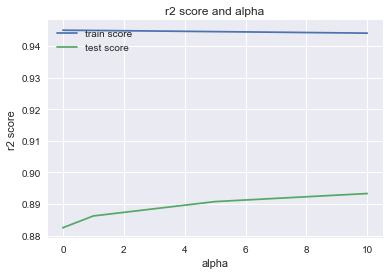

In [103]:
# plotting mean test and train scoes with alpha to tune hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [104]:
# Now let's do k fold with neg_mean_absolute_error score and tune hyper parameter
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [105]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.008375         0.000798    -18113.067000     -12293.382587   
1       0.007780         0.000799    -18109.670932     -12293.512871   
2       0.007379         0.000399    -17891.595918     -12319.956888   
3       0.012169         0.000797    -17602.313654     -12387.285139   
4       0.011173         0.000995    -17418.584547     -12457.575042   

  param_alpha            params  rank_test_score  split0_test_score  \
0       0.001  {'alpha': 0.001}                5      -17666.868220   
1        0.01   {'alpha': 0.01}                4      -17665.779902   
2           1    {'alpha': 1.0}                3      -17572.230238   
3           5    {'alpha': 5.0}                2      -17329.362774   
4          10   {'alpha': 10.0}                1      -17150.616071   

   split0_train_score  split1_test_score  split1_train_score  \
0       -12745.894595      -18027.201627       -12013.479467   
1       -12746.003401      -18026.321512       -12013.530378   
2       -12758.937321      -17951.998646       -12023.755285   
3       -12802.172143      -17902.198725       -12081.621764   
4       -12864.028865      -17915.438583       -12153.441051   

   split2_test_score  split2_train_score  split3_test_score  \
0      -17442.601782       -12481.507576      -18903.348808   
1      -17441.051528       -12481.870045      -18896.759847   
2      -17314.987173       -12501.250872      -18489.297789   
3      -17030.982482       -12551.398618      -17986.198219   
4      -16823.688351       -12615.034804      -17689.208519   

   split3_train_score  split4_test_score  split4_train_score  std_fit_time  \
0       -12296.258055      -18528.159824       -11929.773241      0.001352   
1       -12296.261743      -18521.261340       -11929.898786      0.000745   
2       -12331.304069      -18130.850572       -11984.536893      0.000489   
3       -12401.167427      -17762.682037       -12100.065742      0.004061   
4       -12448.090934      -17512.747226       -12207.279557      0.001467   

   std_score_time  std_test_score  std_train_score  
0        0.000399      538.672054       300.241207  
1        0.000399      536.277703       300.279556  
2        0.000489      412.639005       291.870536  
3        0.000399      364.252169       273.927822  
4        0.000889      388.526991       262.767406

In [106]:
model_cv.best_params_

{'alpha': 10.0}

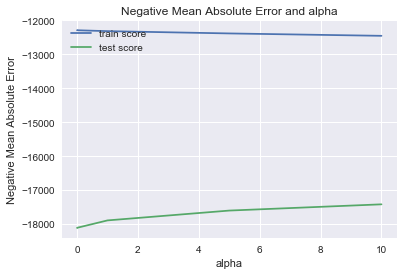

In [107]:
# plotting mean test and train scoes with alpha to tune hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [108]:
# model with optimal alpha = 10
# ridge regression
lm = Ridge(alpha=10)
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.940317204958
0.896658424058


Building the Ridge regression after variable shrinkage done by lasso

In [111]:
# Only the variables with no zero coefficient values are selected
X_new=cols.drop(['BsmtUnfSF','1stFlrSF','BsmtFullBath','GarageArea','PoolArea','MiscVal','gap_between_build_remodel',
          'MSSubClass_50','MSSubClass_60','MSSubClass_190','Neighborhood_MeadowV','Neighborhood_SWISU','Neighborhood_SawyerW','Condition2_Norm',
          'Condition2_RRAn','Condition2_PosA','BldgType_TwnhsE','HouseStyle_1Story','HouseStyle_SLvl','OverallCond_6','RoofStyle_Hip','RoofMatl_Roll','Exterior1st_AsphShn','Exterior1st_Stucco',
'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd','Exterior2nd_Plywood','ExterCond_TA',
'Functional_Min1','SaleType_ConLD','SaleType_ConLw','SaleType_New'     ])

In [112]:
#lets look at the length of the variables after elimination by lasso regression
len(X_new)

191

In [113]:
#lets move the varibles in to a list
reduced_cols=list(X_new)
#removing the constant 
reduced_cols.remove('constant')

In [114]:
#creating the dataframe of the varibles extracted above
X_NEW=X[reduced_cols]

In [115]:
X_NEW.head()

Id   LotArea  OverallQual  YearBuilt  YearRemodAdd  BsmtFinSF1  \
0 -1.732942 -0.242305     0.648080   1.021966      0.856786    0.649091   
1 -1.730571  0.114474    -0.078637   0.133236     -0.446933    1.287535   
2 -1.728200  0.626374     0.648080   0.956135      0.808500    0.132702   
3 -1.725828  0.098962     0.648080  -1.874637     -0.736648   -0.501048   
4 -1.723457  1.560203     1.374798   0.923219      0.711928    0.529383   

   BsmtFinSF2  TotalBsmtSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtHalfBath  \
0   -0.281507    -0.466957  1.215208     -0.111317   0.455818     -0.235135   
1   -0.281507     0.524640 -0.798685     -0.111317  -0.477080      4.022718   
2   -0.281507    -0.310646  1.243506     -0.111317   0.614077     -0.235135   
3   -0.281507    -0.711192  0.984105     -0.111317   0.470395     -0.235135   
4   -0.281507     0.238884  1.684487     -0.111317   1.472010     -0.235135   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0  0.814233  1.233487      0.179038     -0.209867      0.960220   -0.934896   
1  0.814233 -0.757926      0.179038     -0.209867     -0.301245    0.665053   
2  0.814233  1.233487      0.179038     -0.209867     -0.301245    0.665053   
3 -1.044493 -0.757926      0.179038     -0.209867      0.329487    0.665053   
4  0.814233  1.233487      1.422098     -0.209867      1.590952    0.665053   

   GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0    0.322438   -0.755895     0.255246      -0.361273  -0.106481    -0.269018   
1    0.322438    1.759115    -0.727135      -0.361273  -0.106481    -0.269018   
2    0.322438   -0.755895    -0.050742      -0.361273  -0.106481    -0.269018   
3    1.651874   -0.755895    -0.163474       4.255889  -0.106481    -0.269018   
4    1.651874    0.864514     0.625652      -0.361273  -0.106481    -0.269018   

    TotalSF  house_age  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0  0.044029  -1.021966      -0.222113      -0.038662      -0.095059   
1 -0.012679  -0.133236      -0.222113      -0.038662      -0.095059   
2  0.233053  -0.956135      -0.222113      -0.038662      -0.095059   
3 -0.081537   1.874637      -0.222113      -0.038662      -0.095059   
4  1.093115  -0.923219      -0.222113      -0.038662      -0.095059   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0      -0.208839      -0.098977      -0.196875      -0.119929      -0.192748   
1      -0.208839      -0.098977      -0.196875      -0.119929      -0.192748   
2      -0.208839      -0.098977      -0.196875      -0.119929      -0.192748   
3       4.788379      -0.098977      -0.196875      -0.119929      -0.192748   
4      -0.208839      -0.098977      -0.196875      -0.119929      -0.192748   

   MSSubClass_120  MSSubClass_160  MSSubClass_180  MSZoning_FV  MSZoning_RH  \
0       -0.263502       -0.220257       -0.086711    -0.225788     -0.10993   
1       -0.263502       -0.220257       -0.086711    -0.225788     -0.10993   
2       -0.263502       -0.220257       -0.086711    -0.225788     -0.10993   
3       -0.263502       -0.220257       -0.086711    -0.225788     -0.10993   
4       -0.263502       -0.220257       -0.086711    -0.225788     -0.10993   

   MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  LotShape_IR3  \
0     0.533625    -0.428656     0.038662     -0.140666     -0.061199   
1     0.533625    -0.428656     0.038662     -0.140666     -0.061199   
2     0.533625    -0.428656     0.038662     -0.140666     -0.061199   
3     0.533625    -0.428656     0.038662     -0.140666     -0.061199   
4     0.533625    -0.428656     0.038662     -0.140666     -0.061199   

   LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0      0.735003        -0.177659        -0.123091         0.307849   
1      0.735003        -0.177659        -0.123091         0.307849   
2     -1.360538        -0.177659        -0.123091         0.307849   
3     -1.360538        -0

In [116]:
# Split test and train again using new X
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_NEW, y, train_size=0.7,
                                                    test_size = 0.3, 
                                                    random_state = 100)

In [117]:
# list of alphas to tune
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [118]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.009973         0.000800         0.893372          0.943648   
1       0.008975         0.000997         0.893381          0.943648   
2       0.007283         0.000798         0.894196          0.943628   
3       0.011767         0.001197         0.896113          0.943378   
4       0.007380         0.000798         0.897451          0.942962   

  param_alpha            params  rank_test_score  split0_test_score  \
0       0.001  {'alpha': 0.001}                5           0.903077   
1        0.01   {'alpha': 0.01}                4           0.903088   
2           1    {'alpha': 1.0}                3           0.904038   
3           5    {'alpha': 5.0}                2           0.906017   
4          10   {'alpha': 10.0}                1           0.907433   

   split0_train_score  split1_test_score  split1_train_score  \
0            0.940280           0.874818            0.947078   
1            0.940280           0.874824            0.947078   
2            0.940254           0.875441            0.947061   
3            0.939961           0.877027            0.946818   
4            0.939519           0.878179            0.946400   

   split2_test_score  split2_train_score  split3_test_score  \
0           0.896668            0.942543           0.890662   
1           0.896676            0.942543           0.890675   
2           0.897558            0.942529           0.891918   
3           0.900506            0.942321           0.894527   
4           0.903324            0.941914           0.895960   

   split3_train_score  split4_test_score  split4_train_score  std_fit_time  \
0            0.944144           0.901684            0.944193  3.025149e-03   
1            0.944144           0.901689            0.944193  8.064048e-07   
2            0.944123           0.902075            0.944174  6.030324e-04   
3            0.943863           0.902536            0.943924  6.714568e-03   
4            0.943458           0.902406            0.943520  4.883639e-04   

   std_score_time  std_test_score  std_train_score  
0    4.002060e-04        0.010266         0.002231  
1    2.611745e-07        0.010266         0.002231  
2    3.989226e-04        0.010281         0.002233  
3    9.770288e-04        0.010264         0.002243  
4    3.989464e-04        0.010331         0.002251

In [119]:
model_cv.best_params_

{'alpha': 10.0}

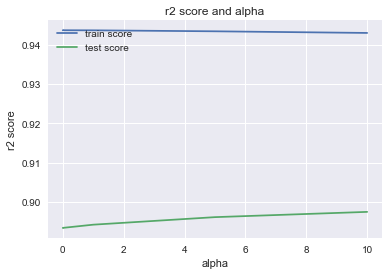

In [120]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [121]:
# Now let's do k fold with neg_mean_absolute_error score and tune hyper parameter
params = {'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [122]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.007179         0.000599    -17413.785900     -12538.652574   
1       0.006782         0.000400    -17413.286351     -12538.672504   
2       0.006184         0.000600    -17364.144520     -12543.405769   
3       0.007580         0.000997    -17247.533973     -12589.753385   
4       0.006181         0.000798    -17151.636014     -12654.990870   

  param_alpha            params  rank_test_score  split0_test_score  \
0       0.001  {'alpha': 0.001}                5      -17045.065560   
1        0.01   {'alpha': 0.01}                4      -17044.517113   
2           1    {'alpha': 1.0}                3      -16990.151627   
3           5    {'alpha': 5.0}                2      -16853.783377   
4          10   {'alpha': 10.0}                1      -16757.501024   

   split0_train_score  split1_test_score  split1_train_score  \
0       -12973.584521      -17958.230708       -12249.594924   
1       -12973.544063      -17958.041165       -12249.565960   
2       -12970.915445      -17939.730728       -12252.043557   
3       -13009.741446      -17922.074551       -12278.215233   
4       -13080.214839      -17897.598093       -12327.126840   

   split2_test_score  split2_train_score  split3_test_score  \
0      -17328.287882       -12693.995909      -17333.302818   
1      -17327.804571       -12694.031815      -17332.488046   
2      -17274.717289       -12698.371419      -17255.082025   
3      -17078.624106       -12742.159346      -17082.562323   
4      -16872.440585       -12790.690476      -16949.902841   

   split3_train_score  split4_test_score  split4_train_score  std_fit_time  \
0       -12543.881469      -17403.102830       -12232.206048      0.000977   
1       -12543.843050      -17402.639760       -12232.377633      0.000400   
2       -12545.180562      -17359.962890       -12250.517863      0.000746   
3       -12577.300856      -17299.123956       -12341.350045      0.002790   
4       -12636.891985      -17278.856100       -12440.030211      0.002220   

   std_score_time  std_test_score  std_train_score  
0        0.000489      299.209315       279.566983  
1        0.000490      299.350353       279.526623  
2        0.000490      313.861614       274.757089  
3        0.001094      366.136792       267.780826  
4        0.000399      411.976774       265.804546

In [123]:
model_cv.best_params_

{'alpha': 10.0}

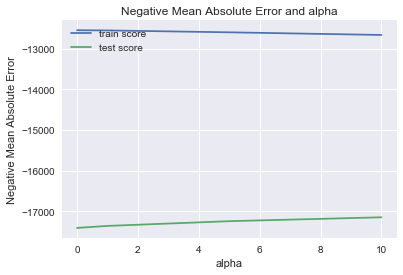

In [124]:
# plotting mean test and train scoes with alpha to tune hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [125]:
# model with optimal alpha = 10
lm = Ridge(alpha=10)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.939553119412
0.897438653903


In [126]:
#lets create a dictionary with coeffiecients
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
final_var=dict(zip(cols, model_parameters))

In [127]:
#sort the dict
{k: v for k, v in sorted(final_var.items(), key=lambda item: item[1])}

{'1stFlrSF': 523.76099999999997,
 '2ndFlrSF': 16538.789000000001,
 '3SsnPorch': 1043.578,
 'BedroomAbvGr': 2737.4850000000001,
 'BldgType_2fmCon': -727.03200000000004,
 'BldgType_Duplex': -185.006,
 'BldgType_Twnhs': -1192.9090000000001,
 'BldgType_TwnhsE': -4.7530000000000001,
 'BsmtFinSF1': 9992.6830000000009,
 'BsmtFinSF2': 2396.1370000000002,
 'BsmtFullBath': 1703.3810000000001,
 'BsmtHalfBath': -4032.7440000000001,
 'BsmtUnfSF': 2140.8389999999999,
 'CentralAir_Y': 680.14599999999996,
 'Condition1_Feedr': -1481.4580000000001,
 'Condition1_Norm': -154.19999999999999,
 'Condition1_PosA': -2916.165,
 'Condition1_PosN': -2000.912,
 'Condition1_RRAe': -2771.2020000000002,
 'Condition1_RRAn': 413.41899999999998,
 'Condition1_RRNe': -609.98699999999997,
 'Condition1_RRNn': -2820.875,
 'Condition2_Feedr': -1571.5989999999999,
 'Condition2_Norm': -1900.4780000000001,
 'Condition2_PosA': 2630.913,
 'Condition2_PosN': 1970.501,
 'Condition2_RRAn': 3102.634,
 'Condition2_RRNn': -825.104000000

With optimal value of alpha = 10 for ridge regression on variables selected by lasso regession, we got following score for train and test data set. R2 for train :0.939553119412 R2 for test 0.897438653903   

This score looks good and we can conclude that model is not overfitting. And this score is pretty close to previous ridge regression model.

Optimal value of alpha of lasso regression is 200 and r2 score for optimal value of alpha is given below R2 score for train :
0.937336911461 R2 score for test : 0.900363594891

Optimal value of alpha of ridge regression is 10 and r2 score for optimal value of alpha is given below R2 score for train :
0.940317204958 R2 score for test :0.896658424058

Optimal value of alpha is 10 for ridge regression on variables selected by lasso regession and r2 score for optimal value of alpha is given below R2 score for train : 0.939553119412 R2 for test 0.897438653903 Lasso has successfully reduced variables by shrinking the variable coefficient to 0